### Importacion de librerias y del archivo original

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## se importan las librerias que se van a usar

In [11]:
##ruta
filePath = 'C:/Users/nahue/OneDrive/Documents/Visual Studio 2017/PI/data_latinoamerica.csv'

## se lee el archivo .csv y se lo nombre df de datafile por convencion
df = pd.read_csv(filePath)
## se chequea que se haya importado
print(df.head())

  location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                

In [12]:
## se chequea que coincidan filas y columnas con el archivo original


raws = df.shape[0]
columns = df.shape[1]

print(f'El archivo tiene {raws} filas, y {columns} columnas.')

El archivo tiene 12216057 filas, y 50 columnas.


### Empieza la limpieza de datos

In [13]:
## filtrando paises
## primero se chequea los paises de la tabla

uniqueCountries = df['country_name'].unique()

print(uniqueCountries)

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


### Se hace una limpieza por subareas teniendo en cuenta los codigos de los paises

In [14]:
## ahora efectivamente se filtran los paises que se necesitan y se crea la mascara

countries = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']

countriesMask = df['country_name'].isin(countries)


##se hace el casteo de la columna date y se le crea la mascara correspondiente

df['date'] = pd.to_datetime(df['date'])

dateMask = df['date'] > '2021-01-01'


## se aplican ambas mascaras

filteredDF = df[countriesMask & dateMask]
print(filteredDF.head())


    location_key       date country_code country_name  new_confirmed  \
367           AR 2021-01-02           AR    Argentina         7767.0   
368           AR 2021-01-03           AR    Argentina         4934.0   
369           AR 2021-01-04           AR    Argentina        13953.0   
370           AR 2021-01-05           AR    Argentina        14085.0   
371           AR 2021-01-06           AR    Argentina        14496.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   
368         157.0             1675568.0              46845.0   
369         157.0             1689521.0              47002.0   
370         160.0             1703606.0              47162.0   
371         131.0             1718102.0              47293.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...   
368                                20529.0  44938712.0  

In [15]:
filteredDF.shape

(7537296, 50)

### Identificacion de nulos y manejo de los mismos

In [16]:
##se intentan borrar columnas y filas que contengan nulos en su totalidad

filteredDF = filteredDF.dropna(axis=0,how='all')
filteredDF = filteredDF.dropna(axis=1,how='all')

filteredDF.shape

(7537296, 50)

In [17]:
filteredDF.isna().sum()

location_key                                   0
date                                           0
country_code                                   0
country_name                                   0
new_confirmed                            3159884
new_deceased                             3162543
cumulative_confirmed                     3159884
cumulative_deceased                      3162543
cumulative_vaccine_doses_administered    7274069
population                                328224
population_male                           706992
population_female                         706992
population_rural                         7533552
population_urban                         7533552
population_density                       7533552
human_development_index                  4075344
population_age_00_09                      922896
population_age_10_19                      922896
population_age_20_29                      922896
population_age_30_39                      922896
population_age_40_49

### Ahora se trabaja sobre las filas. Se eliminaran aquellas que no aporten al analisis

In [18]:
## Se eliminan las filas correspondientes a sub areas que no contenian informacion. Son irregularidades en la tabla

countrieCodes = ['AR', 'CL', 'CO', 'MX', 'PE', 'BR']
finalDF = filteredDF[filteredDF['location_key'].isin(countrieCodes)]

finalDF.shape

(3744, 50)

In [19]:
## location key no aporta nada ahora porque contiene exactamente lo mismo que country code

depuredDF = finalDF.drop(columns='location_key')
depuredDF.shape

(3744, 49)

### Guardado del archivo

In [ ]:
depuredDF.to_csv('DatosFinalesFiltrados.csv', index=False, sep=';')

In [21]:
depuredDF.isna().sum()

date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59                        0
population_age_60_69              

### Se calculan las medianas de algunas columnas para empezar a reemplazar los valores nulos

In [22]:
columnsToReplace = ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', "cumulative_vaccine_doses_administered"]

for column in columnsToReplace:
    ## se calculan las medianas
    valuesMedian = depuredDF[column].median()
    ## se reemplazan los nan por medianas
    depuredDF[column] = depuredDF[column].fillna(valuesMedian)







### Se reemplazan valores null en columnas referidas al clima por el valor del dia anterior

In [23]:
tempColumnsToReplace = ['average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 
                        'rainfall_mm', 'relative_humidity', 'cumulative_recovered']

for tColumn in tempColumnsToReplace:
    ## Se remplazan valores Nan con valor de la fila anterior teniendo en cuenta el pais
    depuredDF[tColumn] = depuredDF.groupby('country_code')[tColumn].fillna(method='ffill')

C:\Users\nahue\AppData\Local\Temp\ipykernel_46644\1741084756.py:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  depuredDF[tColumn] = depuredDF.groupby('country_code')[tColumn].fillna(method='ffill')
C:\Users\nahue\AppData\Local\Temp\ipykernel_46644\1741084756.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  depuredDF[tColumn] = depuredDF.groupby('country_code')[tColumn].fillna(method='ffill')
C:\Users\nahue\AppData\Local\Temp\ipykernel_46644\1741084756.py:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  depuredDF[tColumn] = depur

In [24]:
depuredDF.isna().sum()

date                                        0
country_code                                0
country_name                                0
new_confirmed                               0
new_deceased                                0
cumulative_confirmed                        0
cumulative_deceased                         0
cumulative_vaccine_doses_administered       0
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59                        0
population_age_60_69              

In [25]:
nextColumnsToChange = ['new_recovered', 'cumulative_recovered']

depuredDF[nextColumnsToChange] = depuredDF[nextColumnsToChange].fillna(0)

##quedaba un null en la columna rainfall

depuredDF['rainfall_mm'] = depuredDF['rainfall_mm'].fillna(method='ffill')

C:\Users\nahue\AppData\Local\Temp\ipykernel_46644\2394771872.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  depuredDF['rainfall_mm'] = depuredDF['rainfall_mm'].fillna(method='ffill')


In [26]:
##ruta
filePath = 'C:/Users/nahue/OneDrive/Documents/Visual Studio 2017/PI/DatosFinalesFiltrados.csv'
## se lee el archivo .csv y se lo nombre df de datafile por convencion
df = pd.read_csv(filePath, delimiter= ';')
## se chequea que se haya importado

In [27]:
##Cambio a float32

df[df.select_dtypes(include='float64').columns] = df.select_dtypes(include='float64').astype('float32')

print(df.dtypes)

date                                      object
country_code                              object
country_name                              object
new_confirmed                            float32
new_deceased                             float32
cumulative_confirmed                     float32
cumulative_deceased                      float32
cumulative_vaccine_doses_administered    float32
population                               float32
population_male                          float32
population_female                        float32
population_rural                         float32
population_urban                         float32
population_density                       float32
human_development_index                  float32
population_age_00_09                     float32
population_age_10_19                     float32
population_age_20_29                     float32
population_age_30_39                     float32
population_age_40_49                     float32
population_age_50_59

### Se usa diccionario y ciclos de repeticion para calcular metricas sobre las columnas numericas

In [28]:
## se crea diccionario para guardar resultados

results = {}

for column in df.select_dtypes(include='float32').columns:
    mean = df[column].mean()  
    std_dev = df[column].std()  
    minimum = df[column].min() 
    maximum = df[column].max()  
    q25 = df[column].quantile(0.25)  
    q50 = df[column].quantile(0.5)  
    q75 = df[column].quantile(0.75)  
    median = df[column].median()  
    variance = df[column].var() 
    range_value = maximum - minimum  
    
    ## se almacenan los resultados en el diccionario
    results[column] = {
        'mean': mean,
        'std_dev': std_dev,
        'minimum': minimum,
        'maximum': maximum,
        'q25': q25,
        'q50': q50,
        'q75': q75,
        'median': median,
        'variance': variance,
        'range': range_value
    }


for column, stats in results.items():
    print(f"\nEstadisticas para columna {column}:")
    for statistic, value in stats.items():
        print(f"{statistic}: {value}")


Estadisticas para columna new_confirmed:
mean: 13936.2802734375
std_dev: 24273.6171875
minimum: -573.0
maximum: 298408.0
q25: 1530.5
q50: 5176.0
q75: 14915.0
median: 5176.0
variance: 589208512.0
range: 298981.0

Estadisticas para columna new_deceased:
mean: 277.16412353515625
std_dev: 508.4493713378906
minimum: 0.0
maximum: 11447.0
q25: 25.5
q50: 99.0
q75: 313.5
median: 99.0
variance: 258520.75
range: 11447.0

Estadisticas para columna cumulative_confirmed:
mean: 6784382.0
std_dev: 7999625.5
minimum: 971.0
maximum: 34568832.0
q25: 2129799.5
q50: 3633546.0
q75: 6223497.0
median: 3633546.0
variance: 63994006077440.0
range: 34567860.0

Estadisticas para columna cumulative_deceased:
mean: 193136.765625
std_dev: 183022.3125
minimum: 1.0
maximum: 685203.0
q25: 59225.0
q50: 139636.0
q75: 215123.5
median: 139636.0
variance: 33497167872.0
range: 685202.0

Estadisticas para columna cumulative_vaccine_doses_administered:
mean: 77539584.0
std_dev: 95889624.0
minimum: 18.0
maximum: 347868480.0
q25

### Se crea una formula para calcular mediana, varianza y rango

In [29]:
def computingStats(df, column):
    median = df[column].median()
    variance = df[column].var()
    range_value = df[column].max() - df[column].min()

    return {
        "median": median,
        "variance": variance,
        "range": range_value
    }

In [30]:
print(df.columns)



Index(['date', 'country_code', 'country_name', 'new_confirmed', 'new_deceased',
       'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 'area_ur

In [31]:
#Se identifica el grupo de columnas que se graficara

numColumnsToGraph = ['new_confirmed', 'new_deceased', 'population', 'population_male', 'population_female', 'population_rural',
                    'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 
                    'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
                    'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'area_sq_km', 
                    'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 
                    'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 
                    'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 
                    'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate']


### Empezamos a tirar graficos

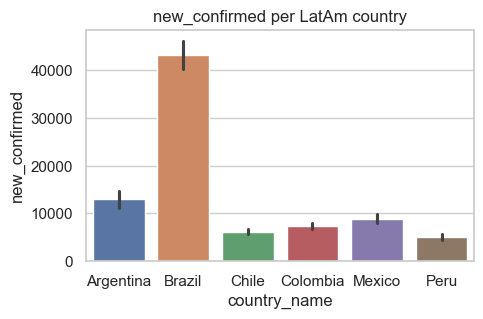

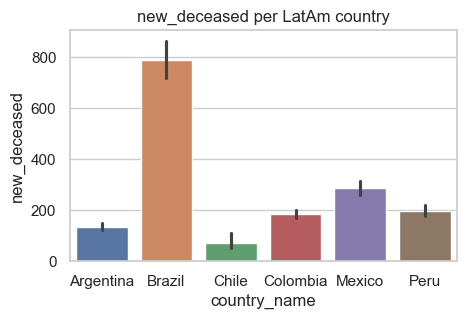

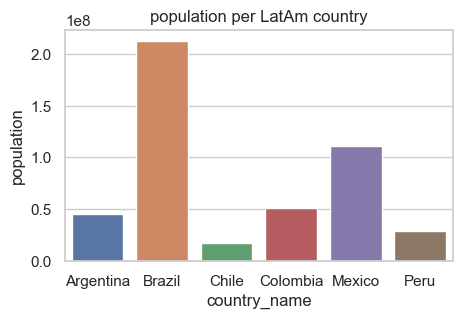

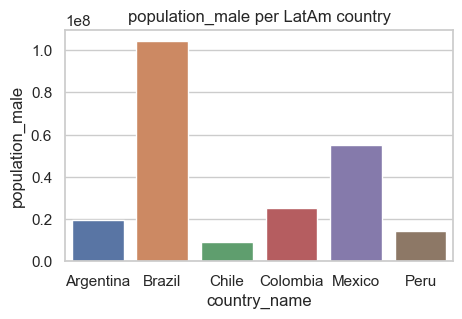

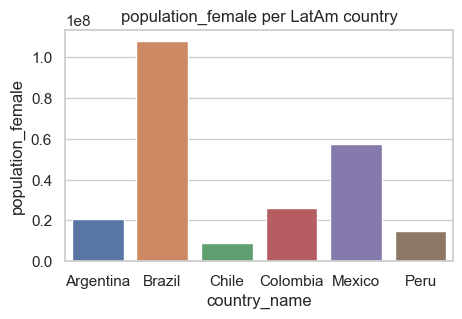

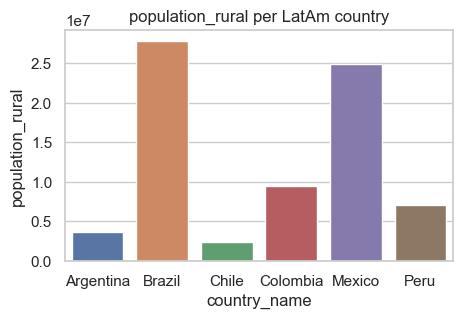

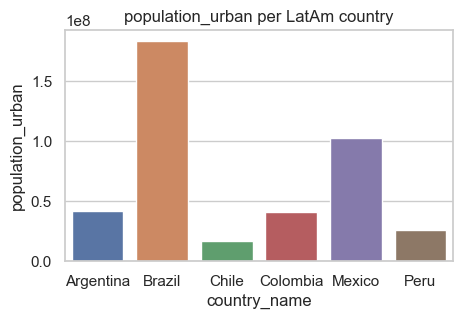

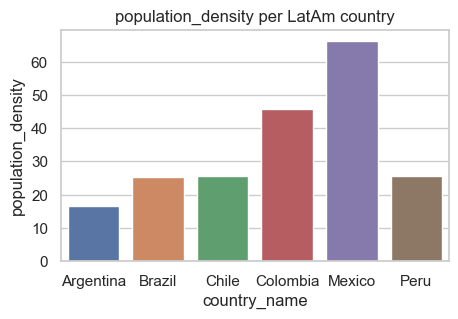

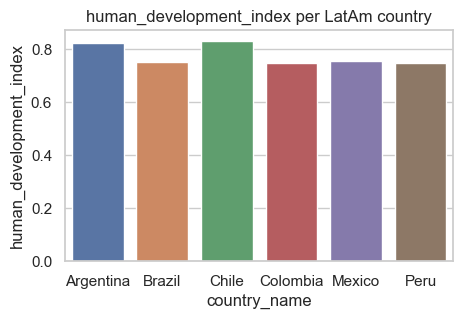

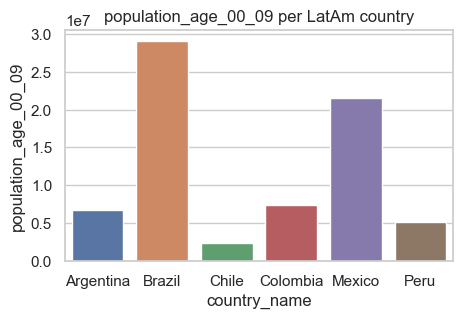

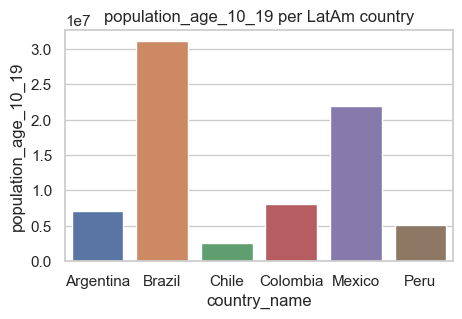

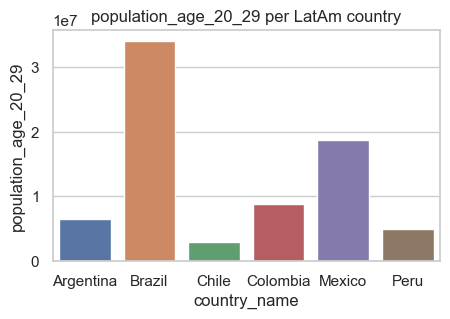

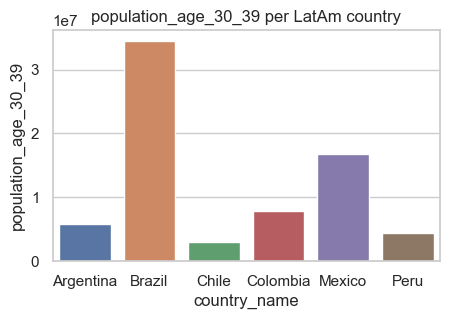

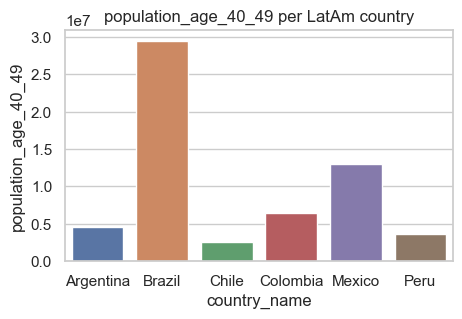

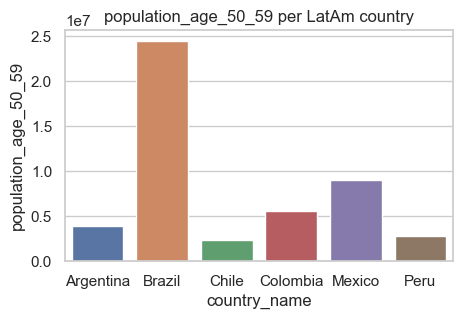

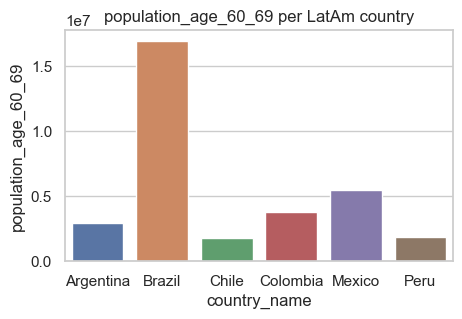

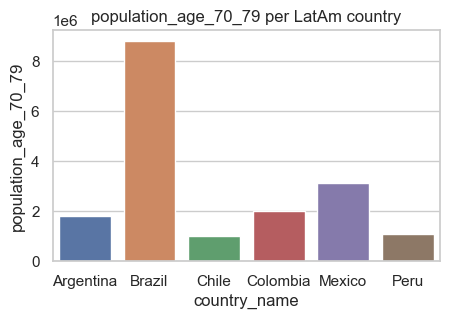

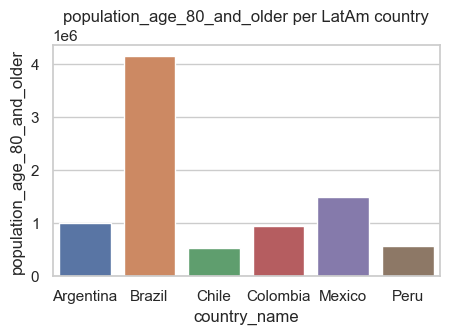

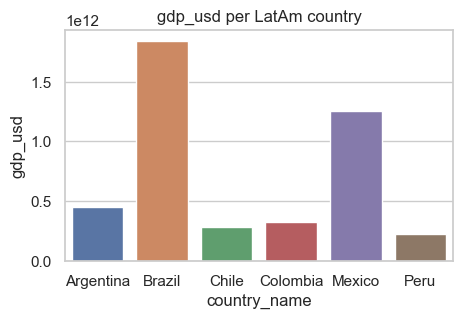

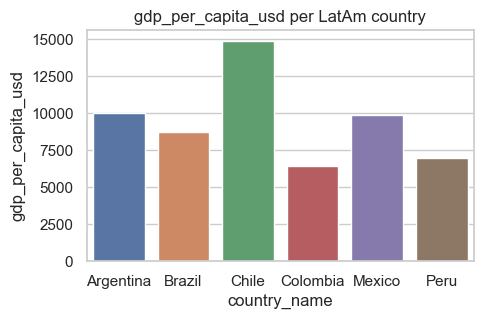

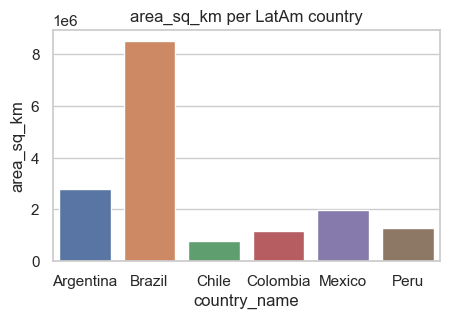

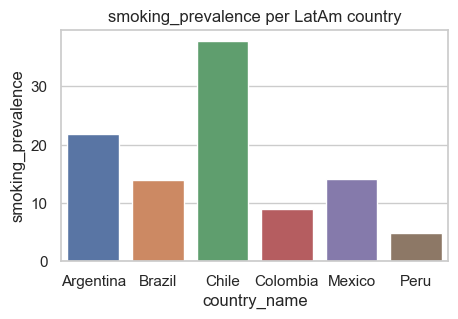

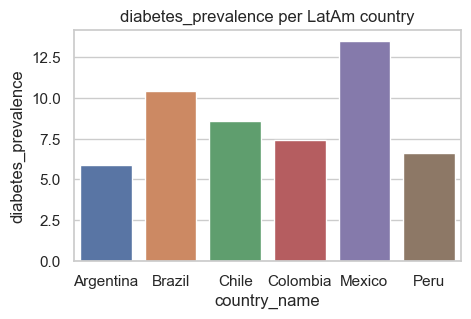

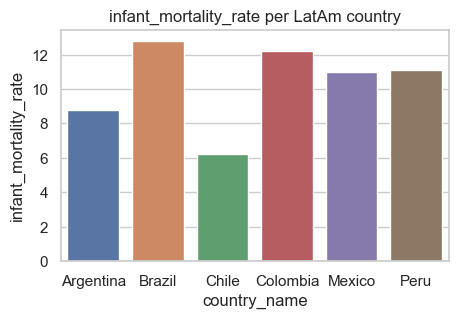

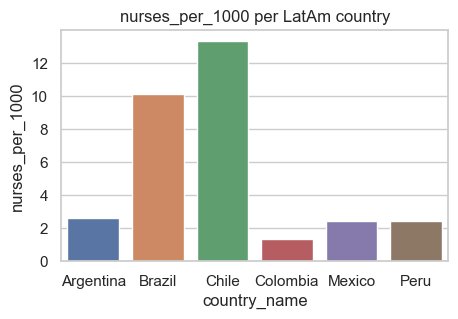

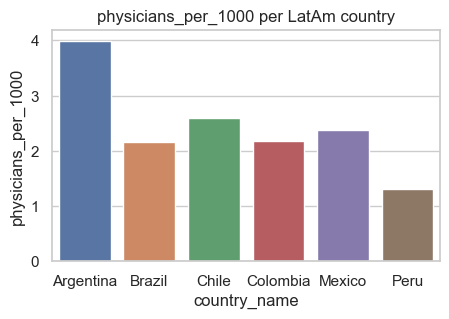

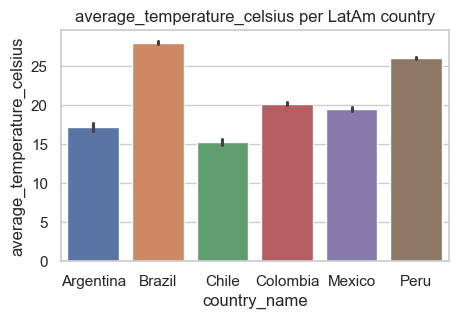

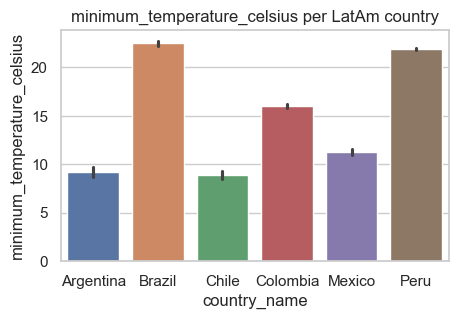

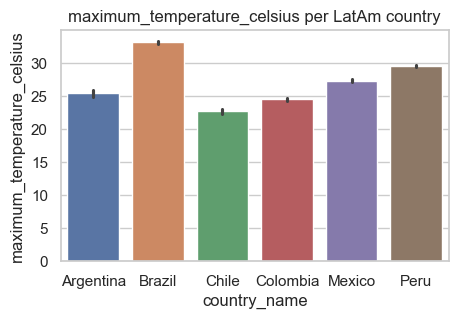

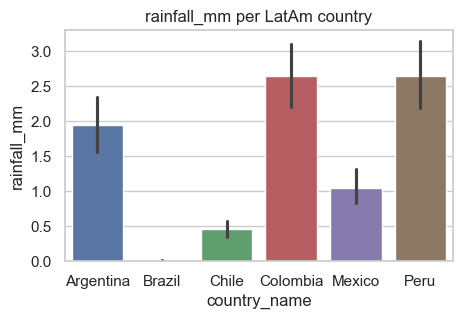

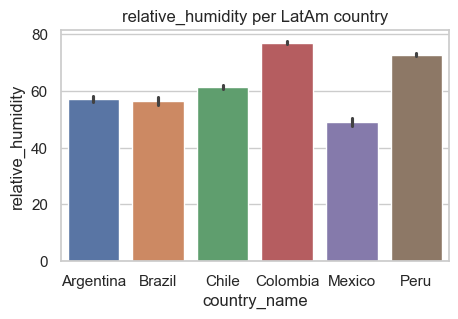

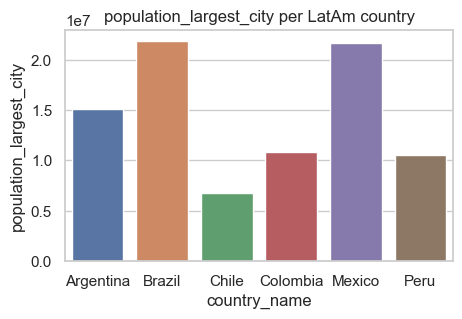

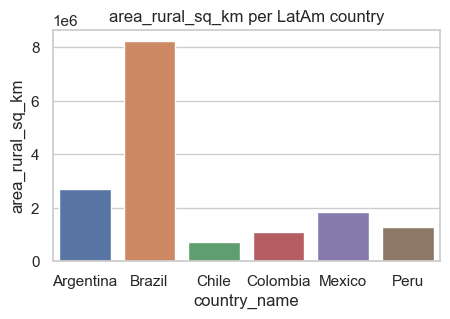

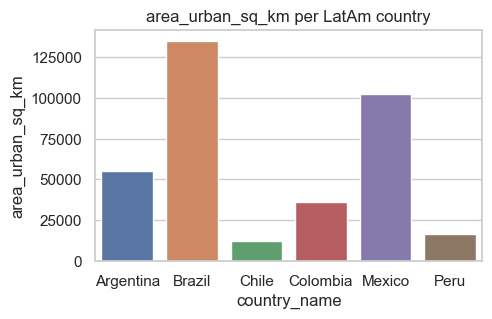

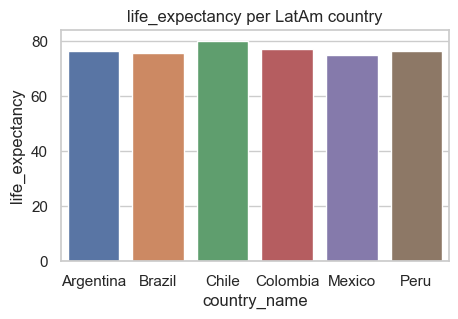

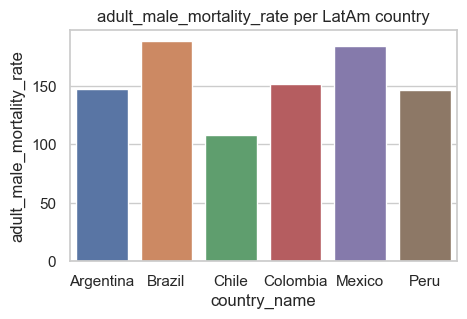

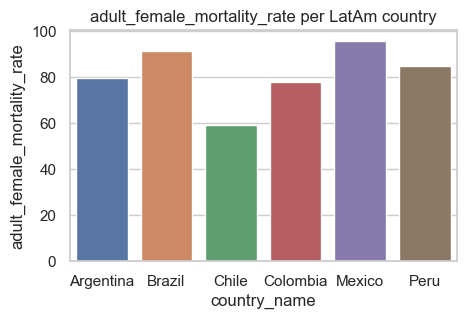

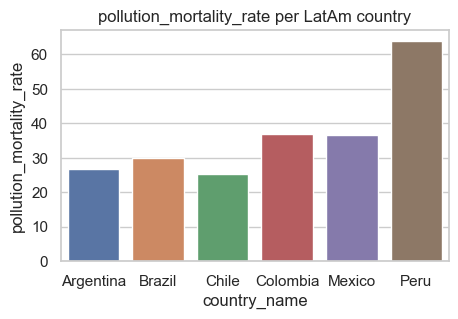

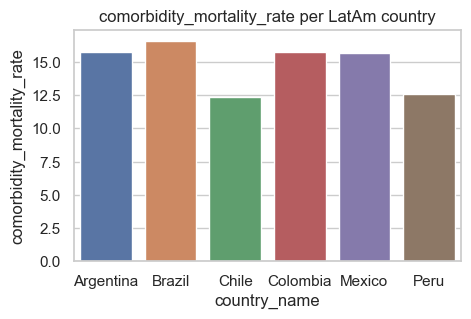

In [32]:
## se empieza con unos graficos de barra por paises

for index in numColumnsToGraph:
    fig, ax = plt.subplots(figsize=(5,3))
    sns.barplot(x='country_name', y=index, data=df, ax=ax, hue= 'country_name')
    plt.title(f'{index} per LatAm country')
    plt.show()
        

### Se grafica un heatmap para ver como interactuan las variables entre si

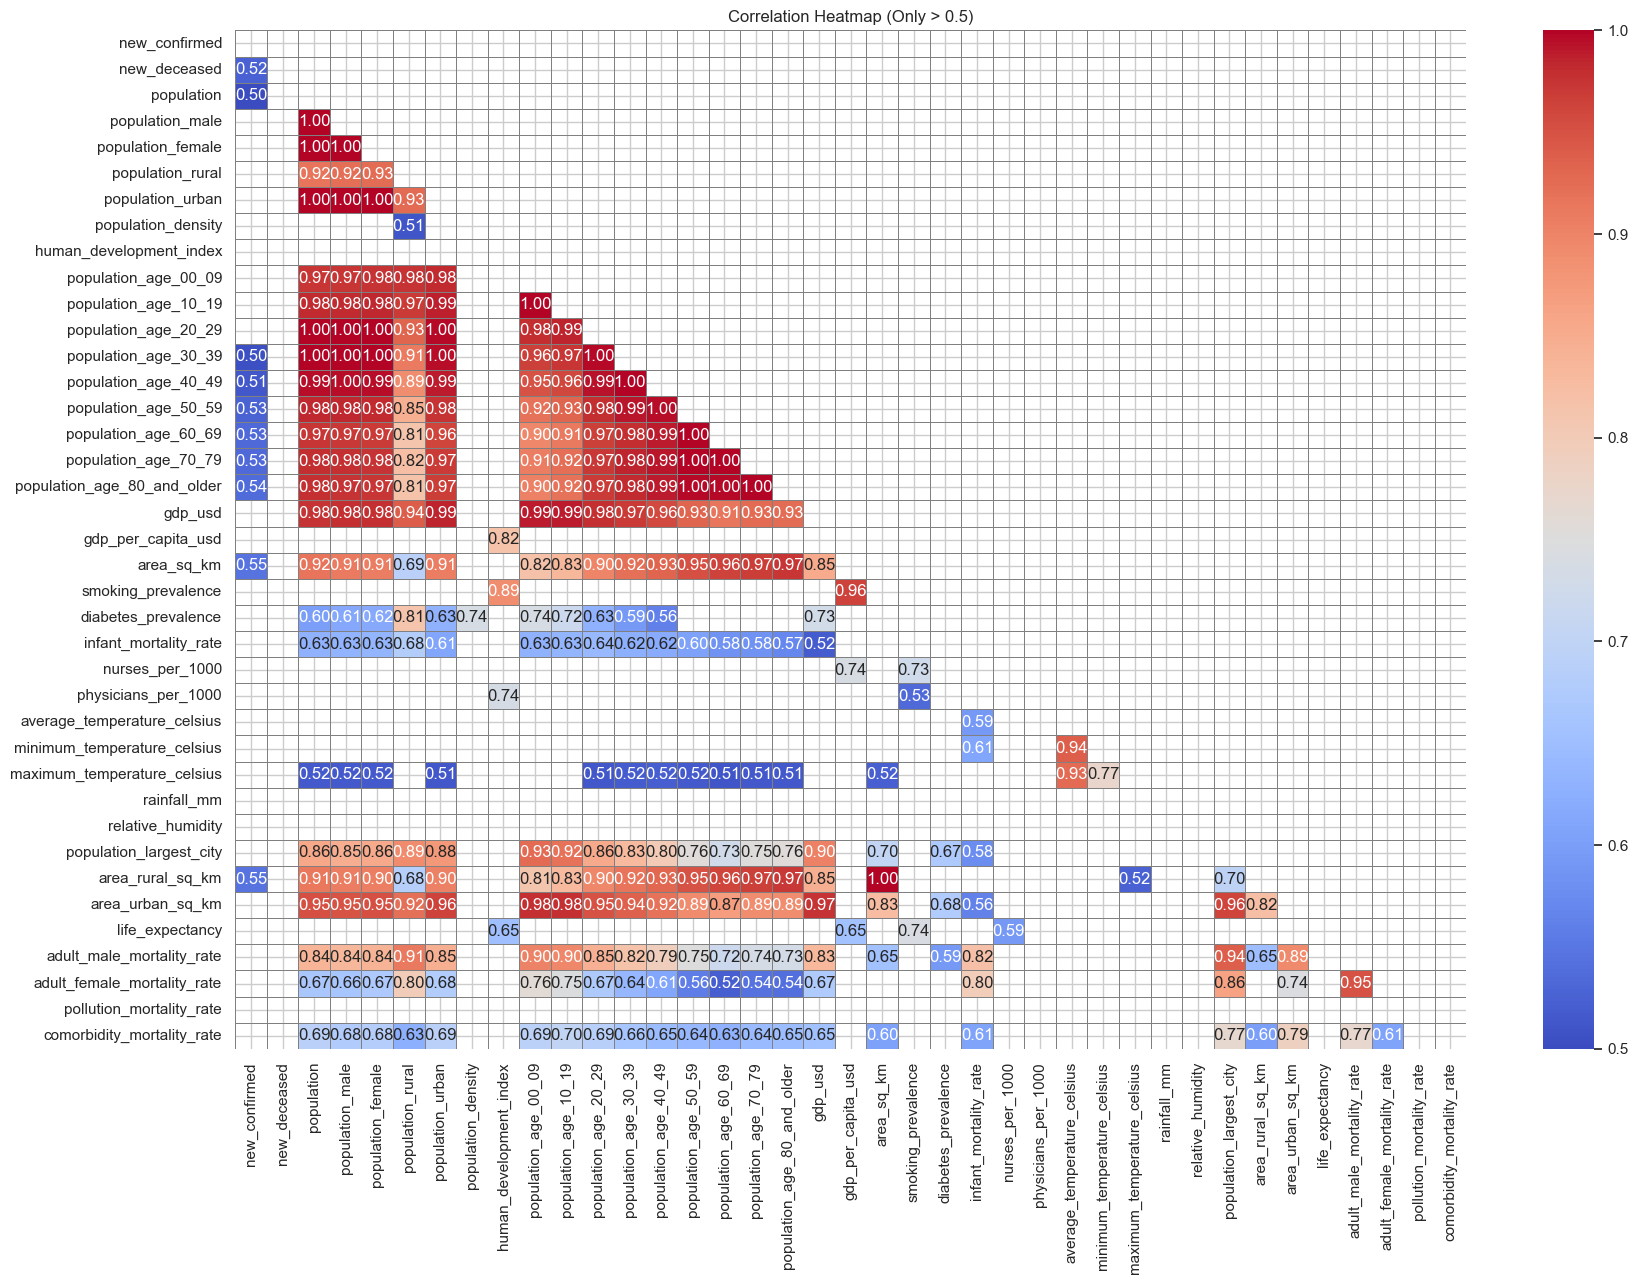

In [33]:
dfNumColumnsToGraph = df[numColumnsToGraph]
corr_matrix = dfNumColumnsToGraph.corr()
## Crear máscara para ocultar la mitad superior
hidingMask = np.triu(np.ones_like(corr_matrix, dtype=bool))
## dejar solo las correlaciones > 0.5
filtered_corr = corr_matrix.where(corr_matrix > 0.5)

plt.figure(figsize=(18,13))
sns.heatmap(
    filtered_corr,
    mask=hidingMask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=0.5, vmax=1.0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Correlation Heatmap (Only > 0.5)")
plt.tight_layout()
plt.show()

### Se busca hacer histogramas

In [34]:
# se chequea que columnas tienen cambios de valores y se las guarda en changingValuesColumns para tirar histogramas


changingValuesColumns = dfNumColumnsToGraph.nunique()[dfNumColumnsToGraph.nunique() > 1].index.tolist()

print("Columnas con cambios de valores:", changingValuesColumns)

Columnas con cambios de valores: ['new_confirmed', 'new_deceased', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban', 'population_density', 'human_development_index', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy', 'adult_male_mortality_rate', 'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate']


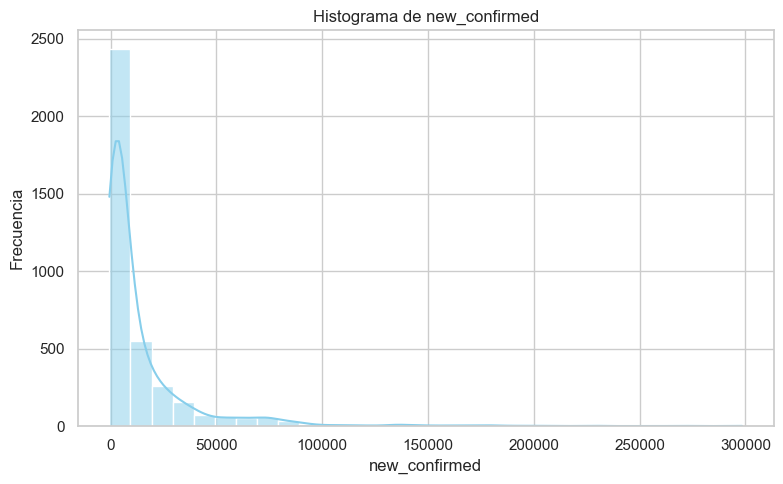

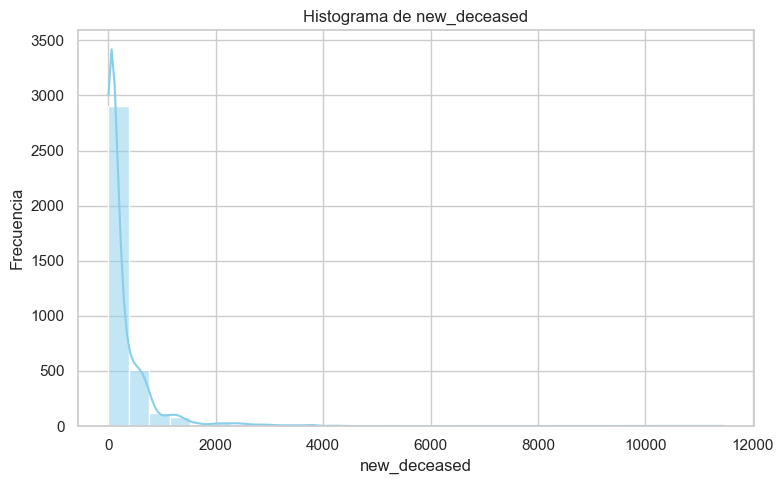

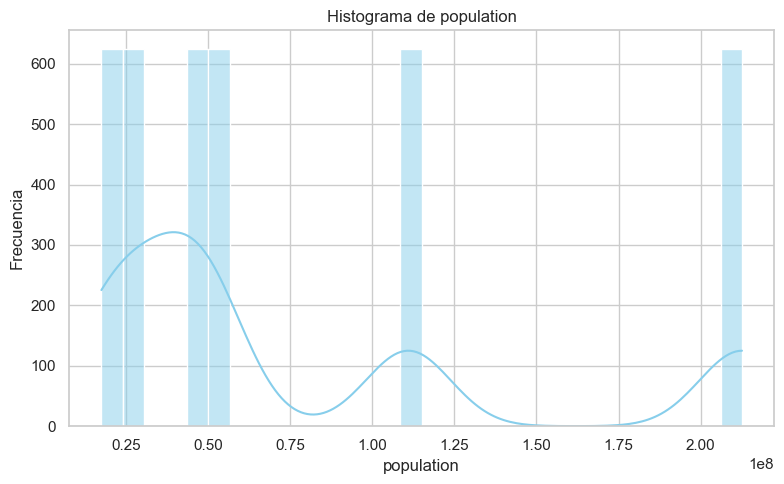

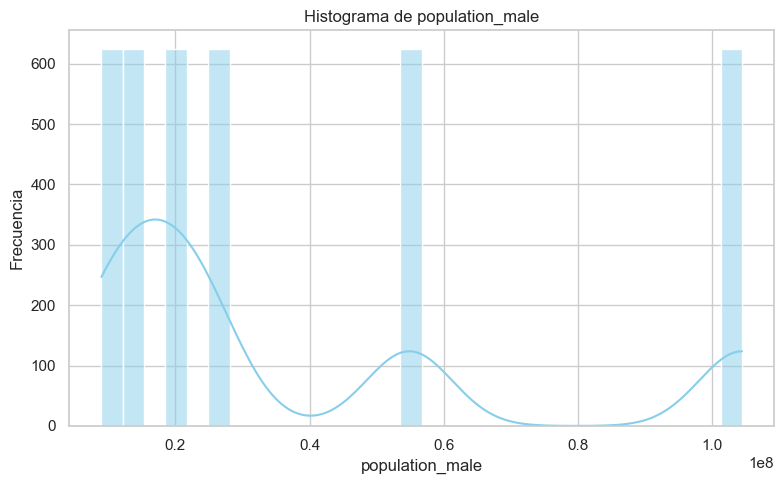

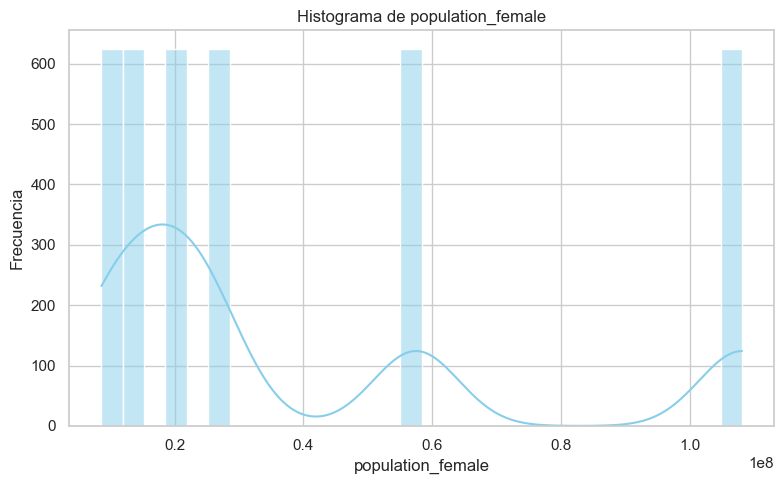

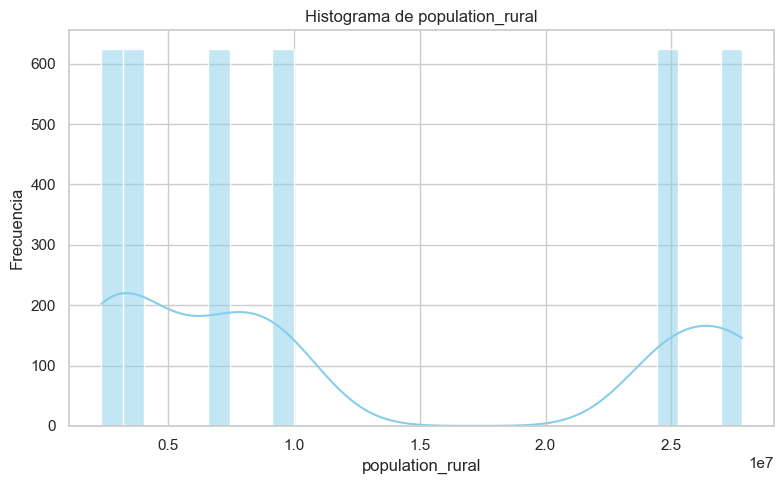

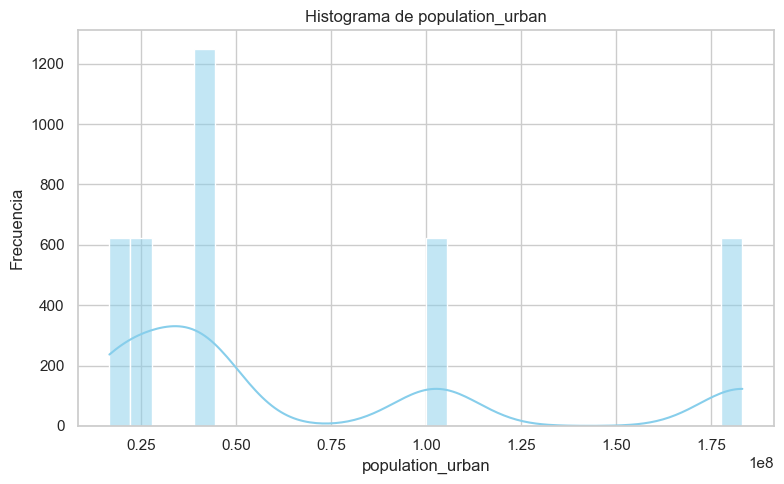

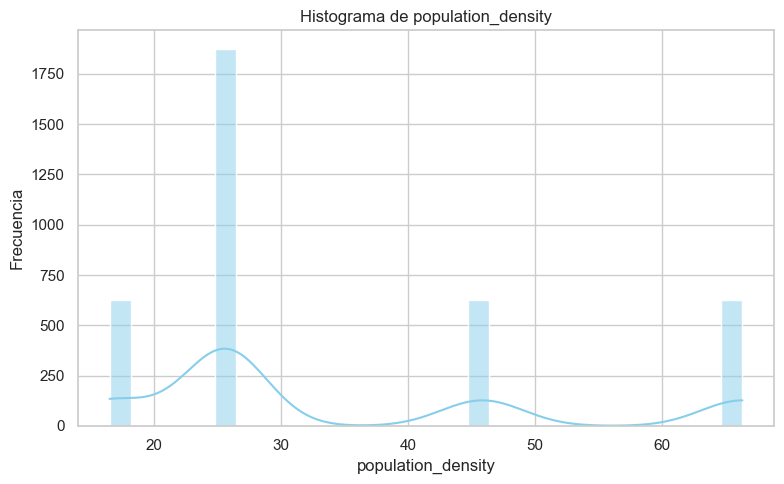

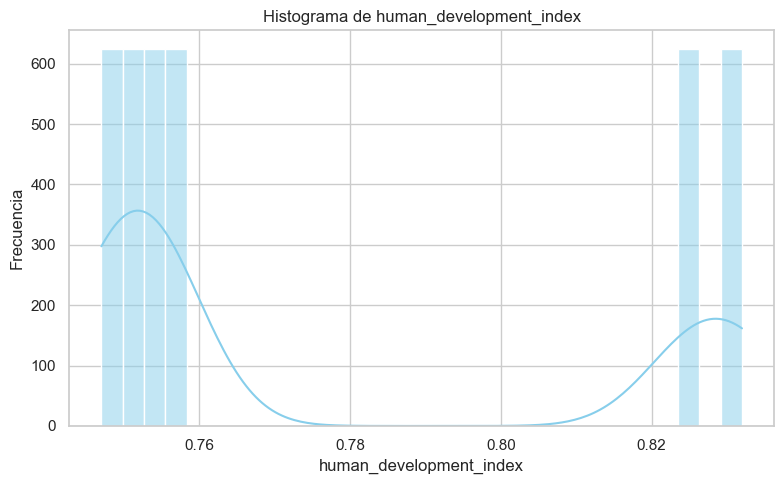

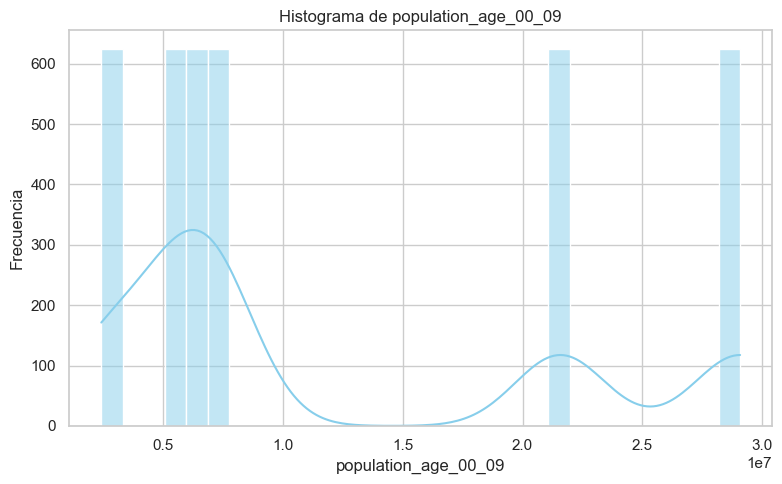

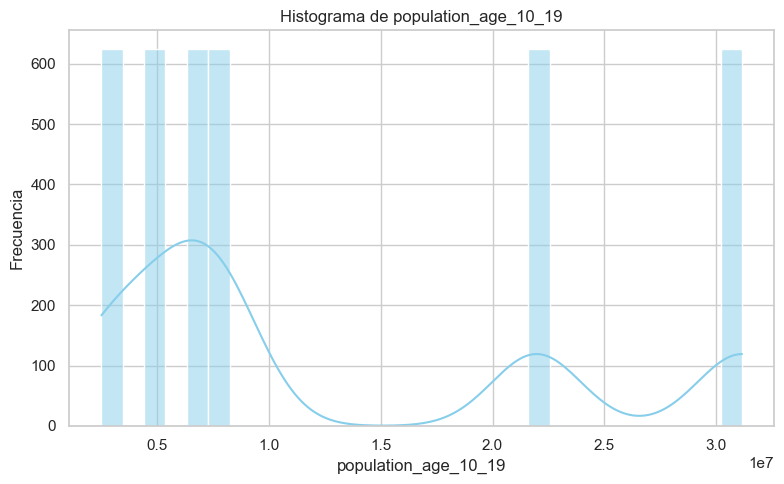

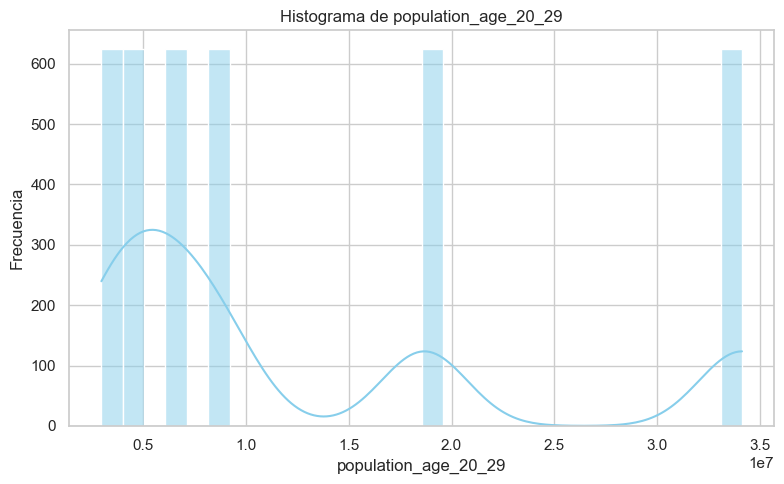

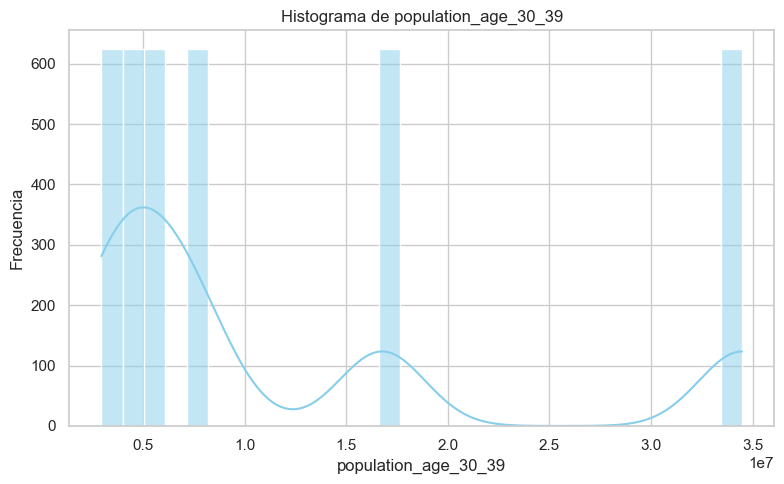

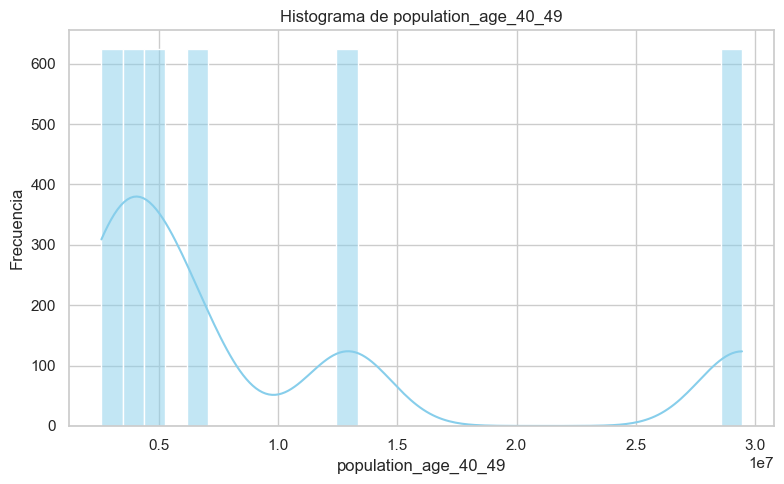

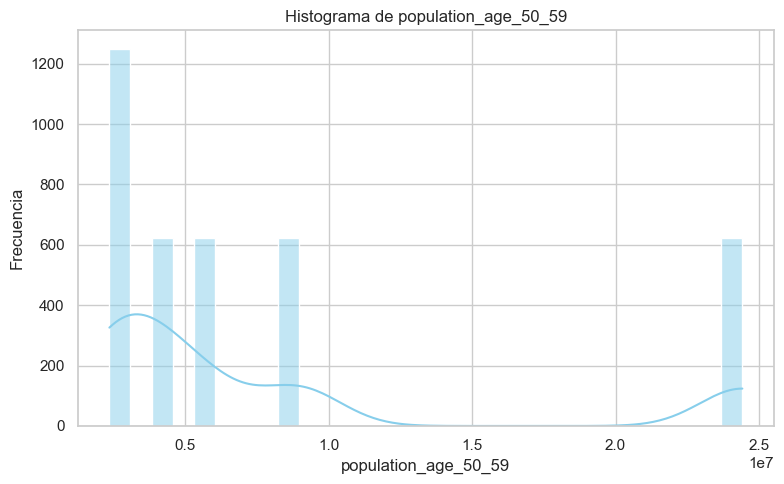

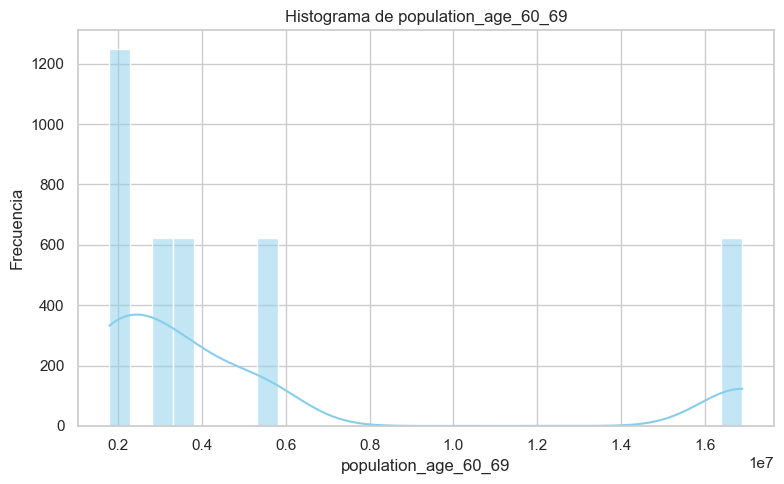

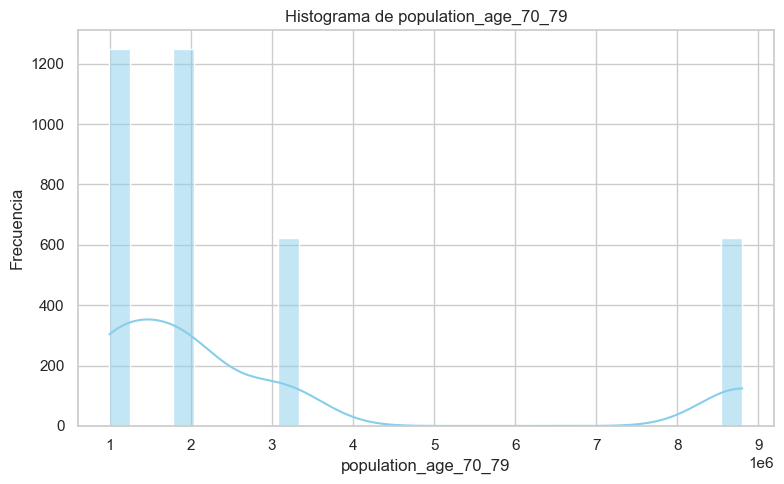

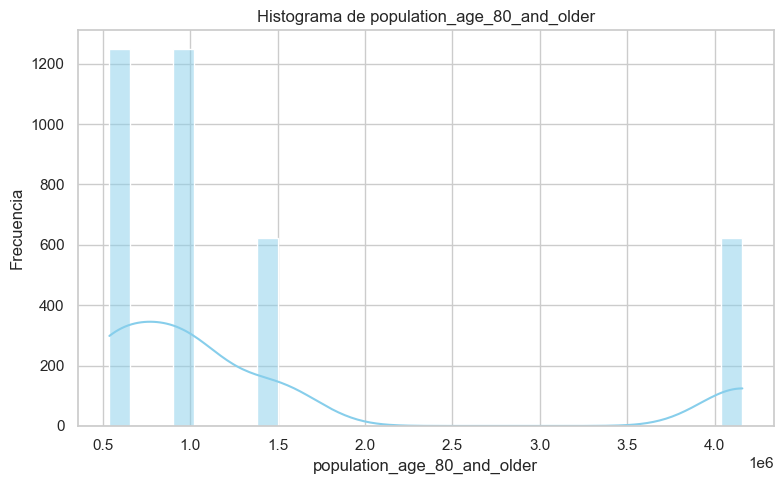

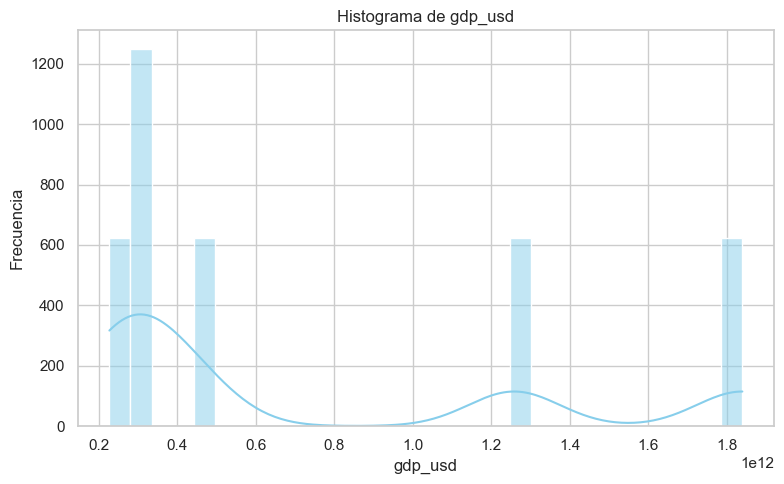

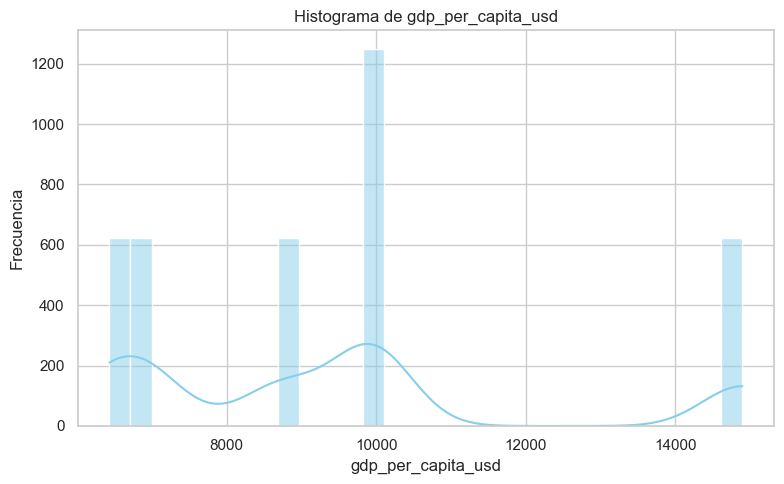

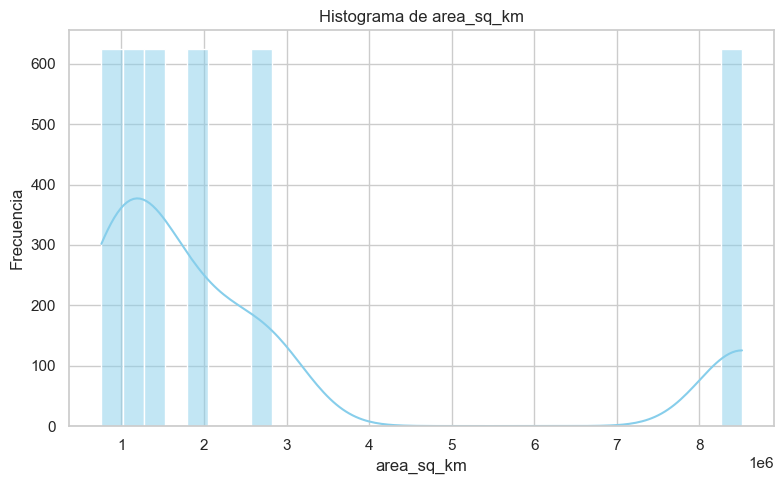

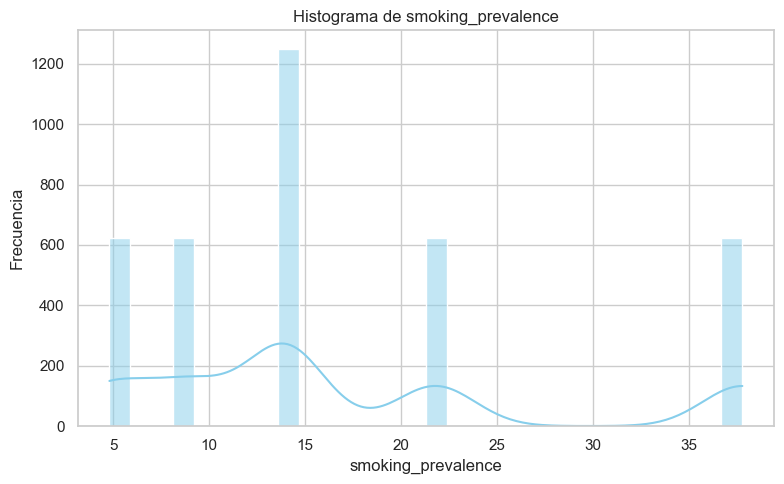

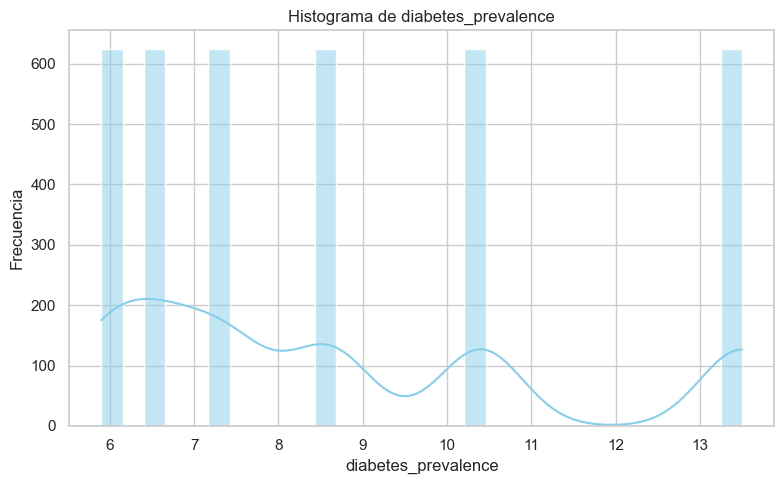

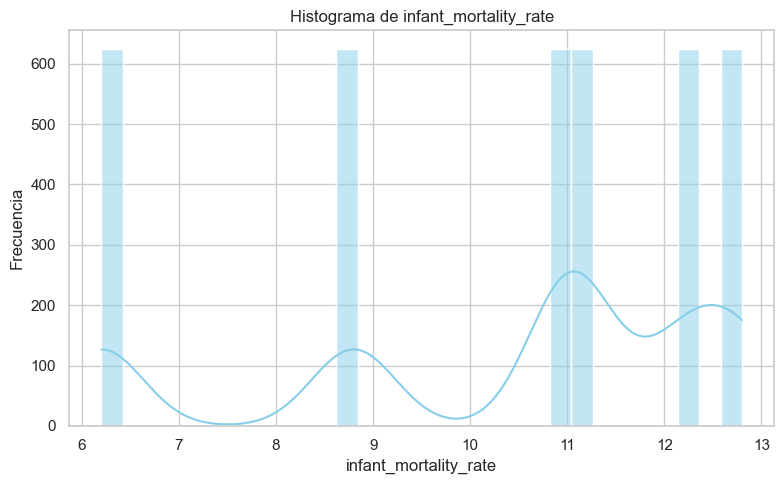

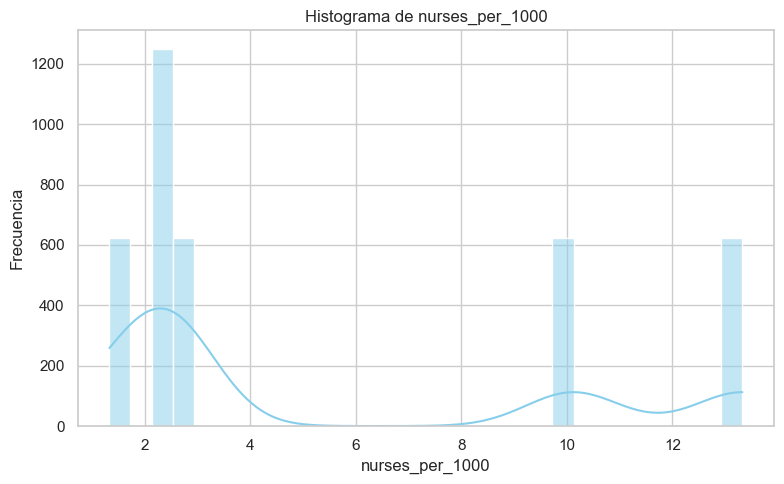

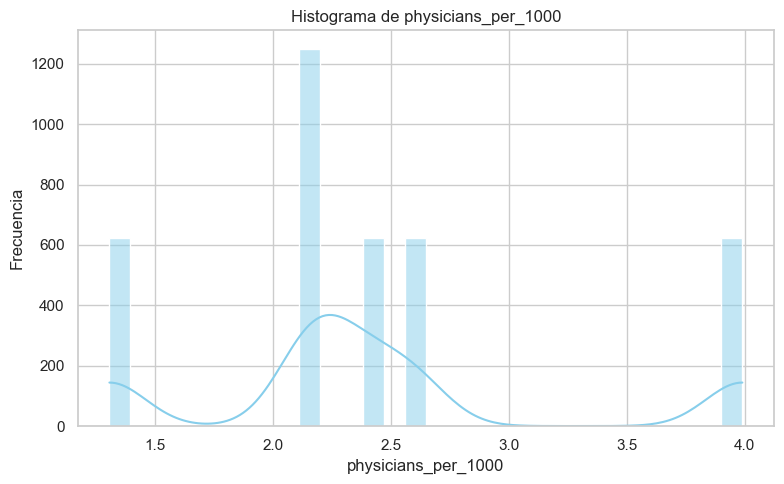

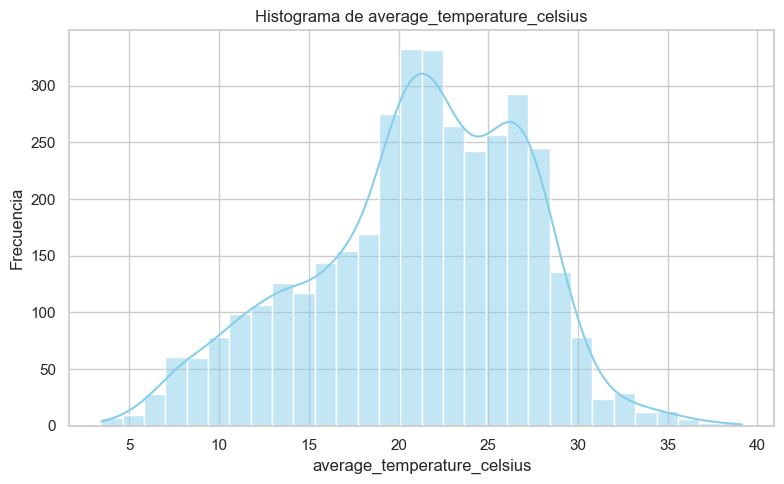

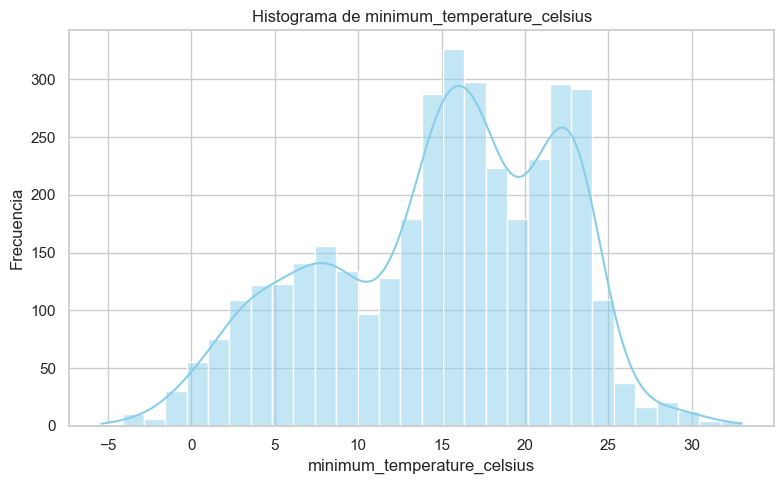

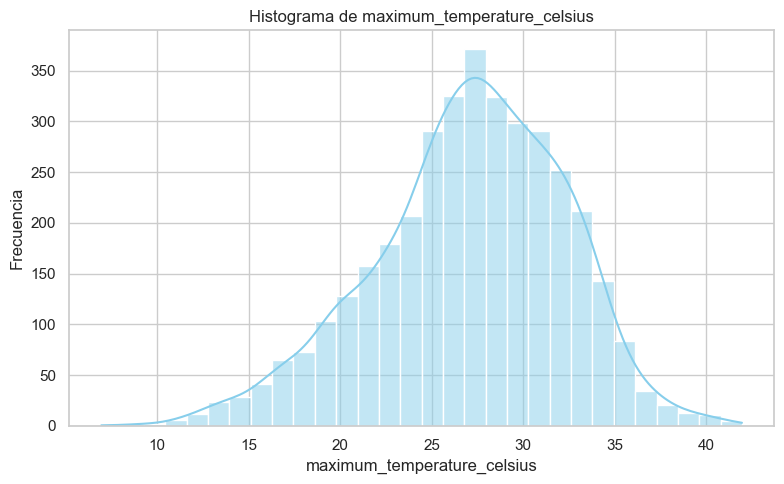

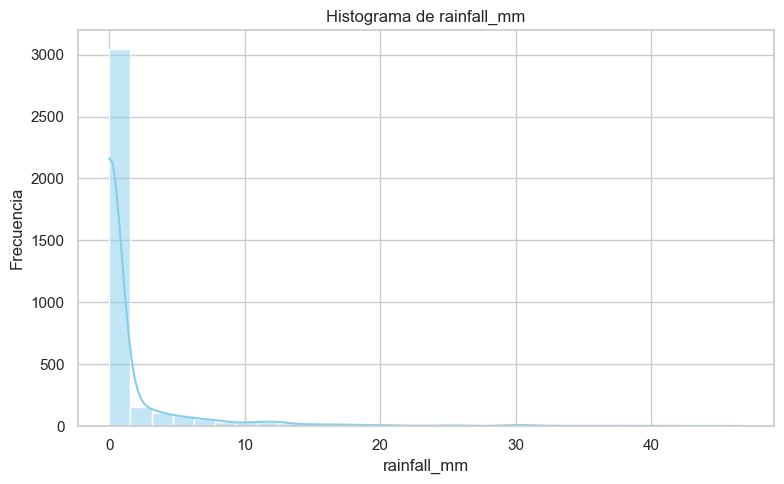

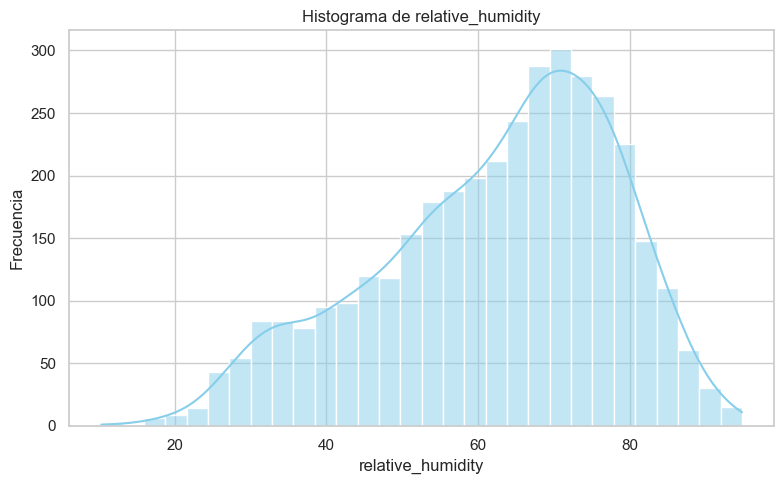

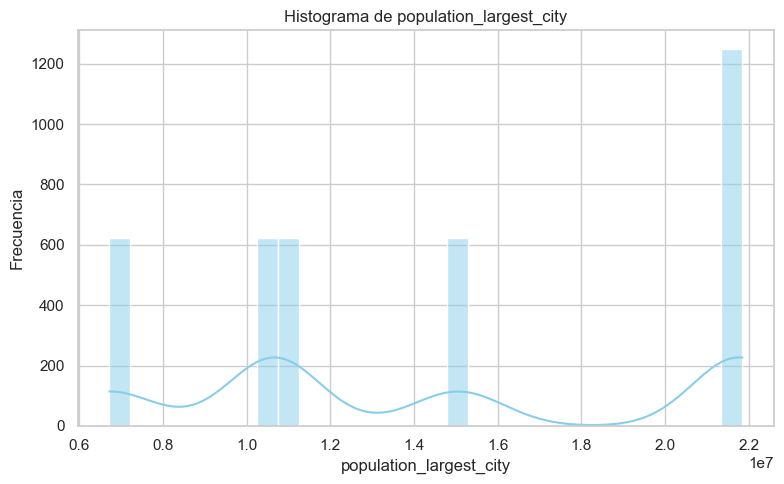

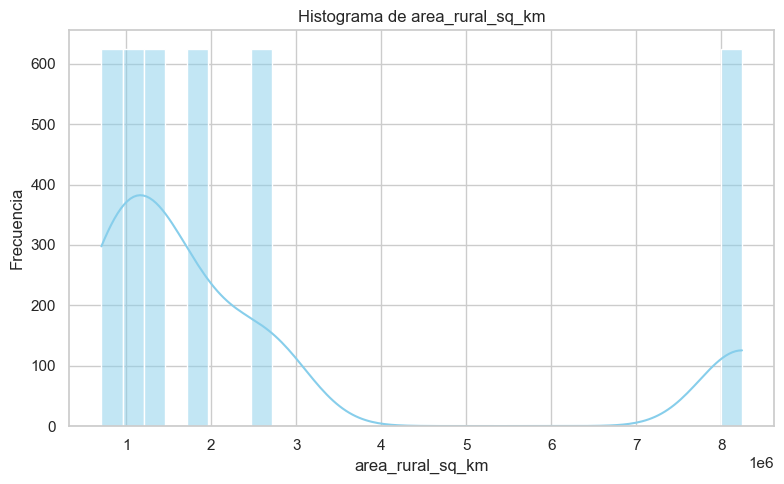

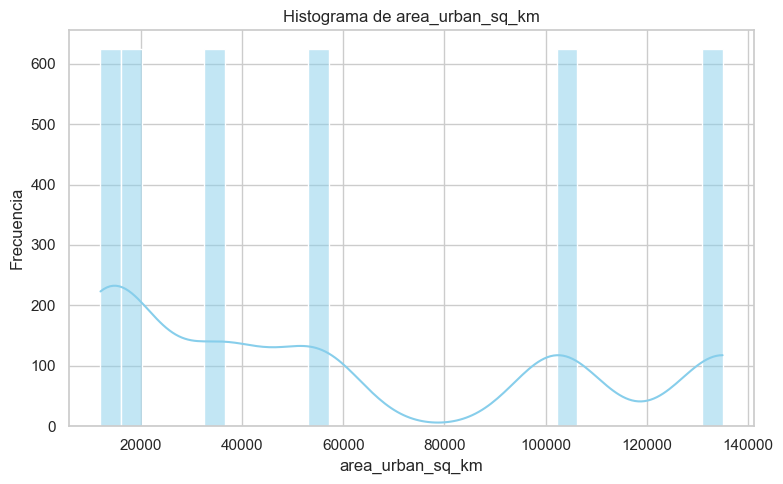

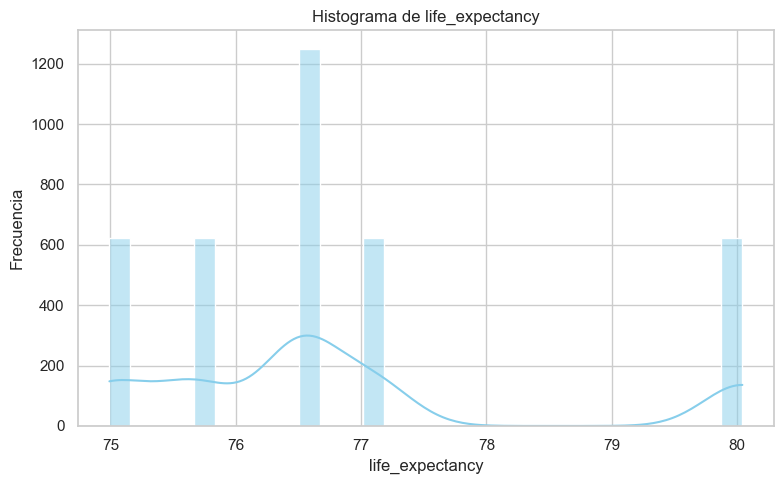

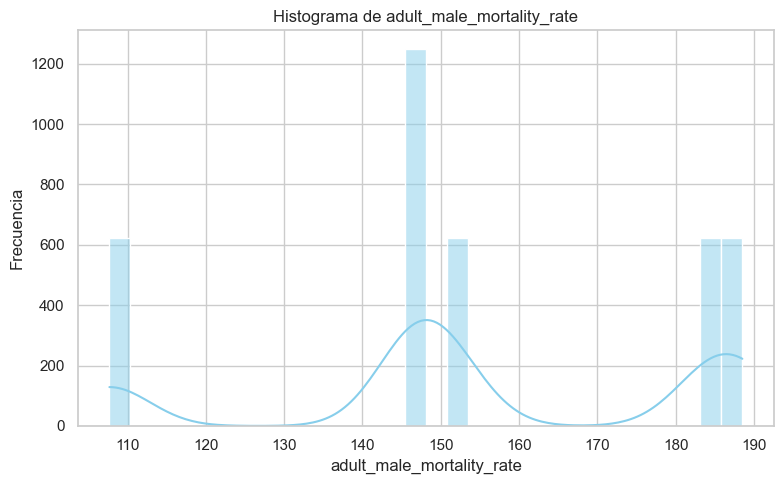

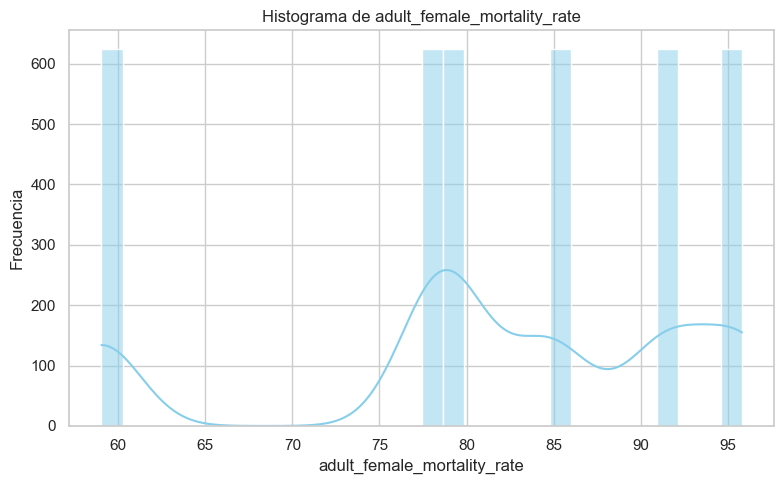

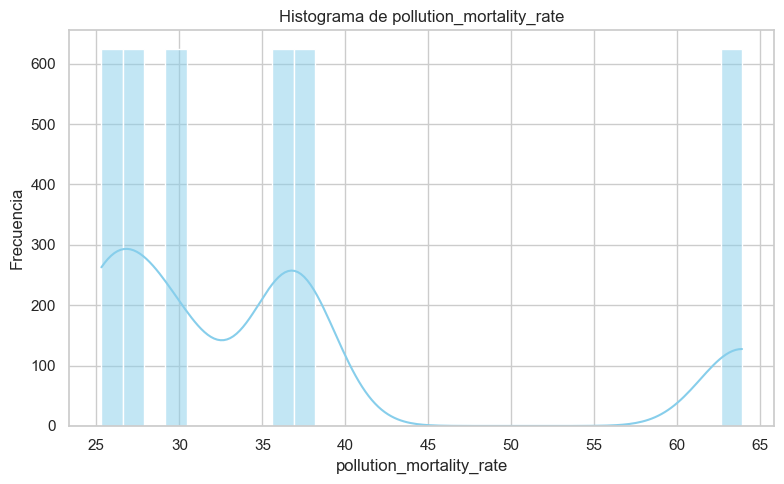

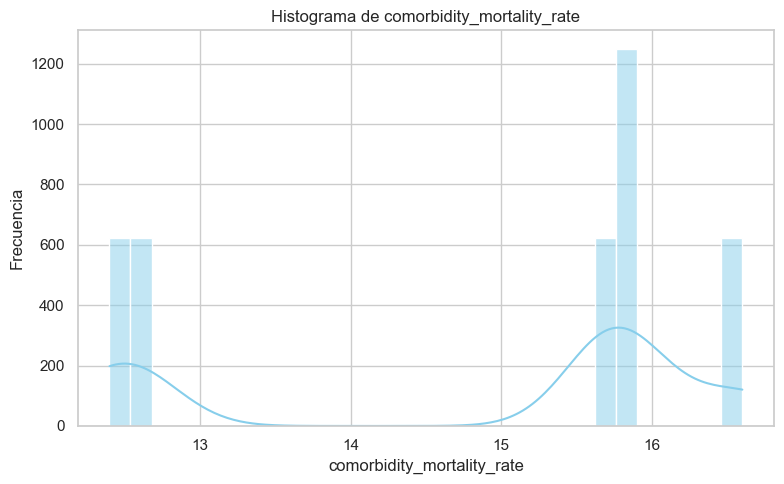

In [35]:
# Estilo general de los plots
sns.set(style="whitegrid")

# Creacion de los histogramas
for col in changingValuesColumns:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

### Se grafican scatter plots para muertes confirmadas y casos confirmados de covid respecto a las temperaturas medias por pais

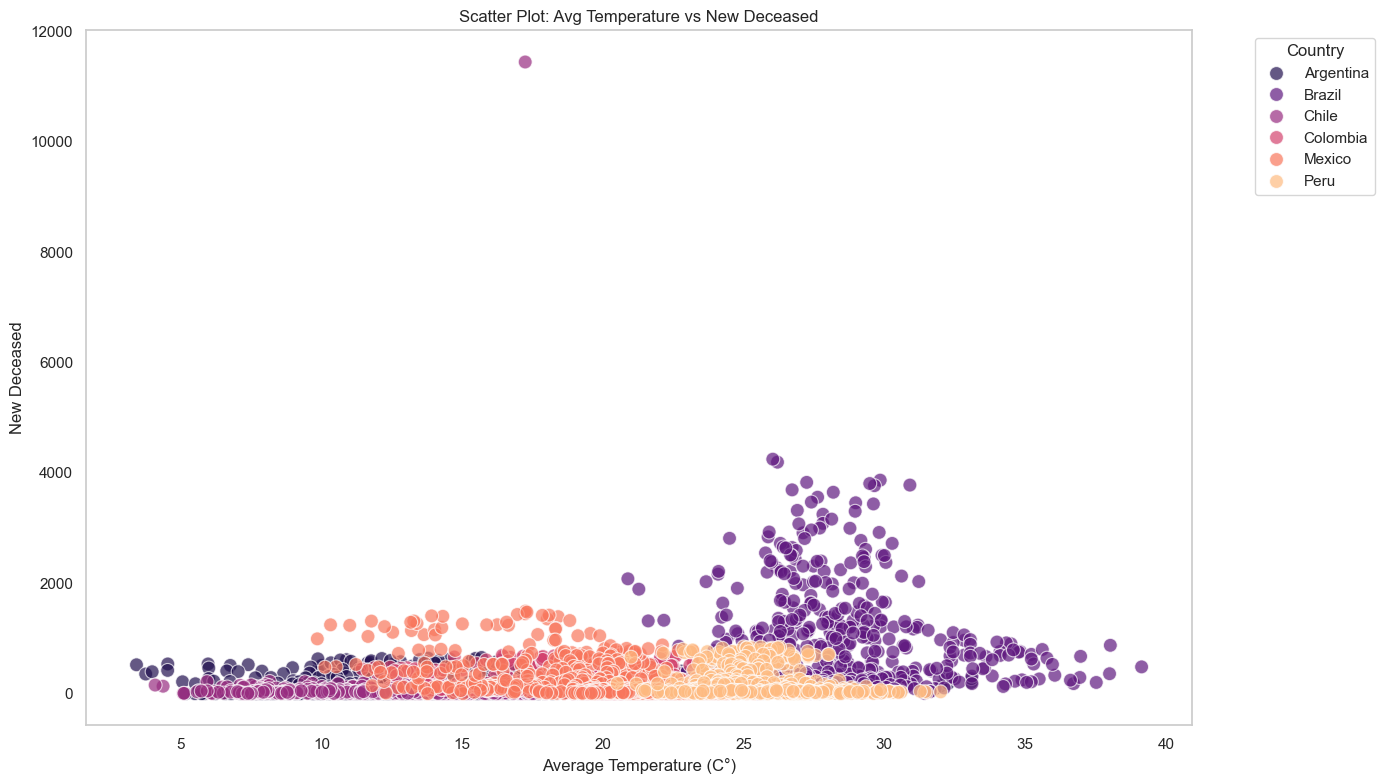

In [36]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='average_temperature_celsius',
    y='new_deceased',
    hue='country_name',         ## separar por pais
    palette='magma',            ## colores
    alpha=0.7,                  ## transparencia
    s=100                       ## cambio de punto a burbuja  
)

plt.title("Scatter Plot: Avg Temperature vs New Deceased")
plt.xlabel("Average Temperature (C°)")
plt.ylabel("New Deceased")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.tight_layout()
plt.grid()
plt.show()



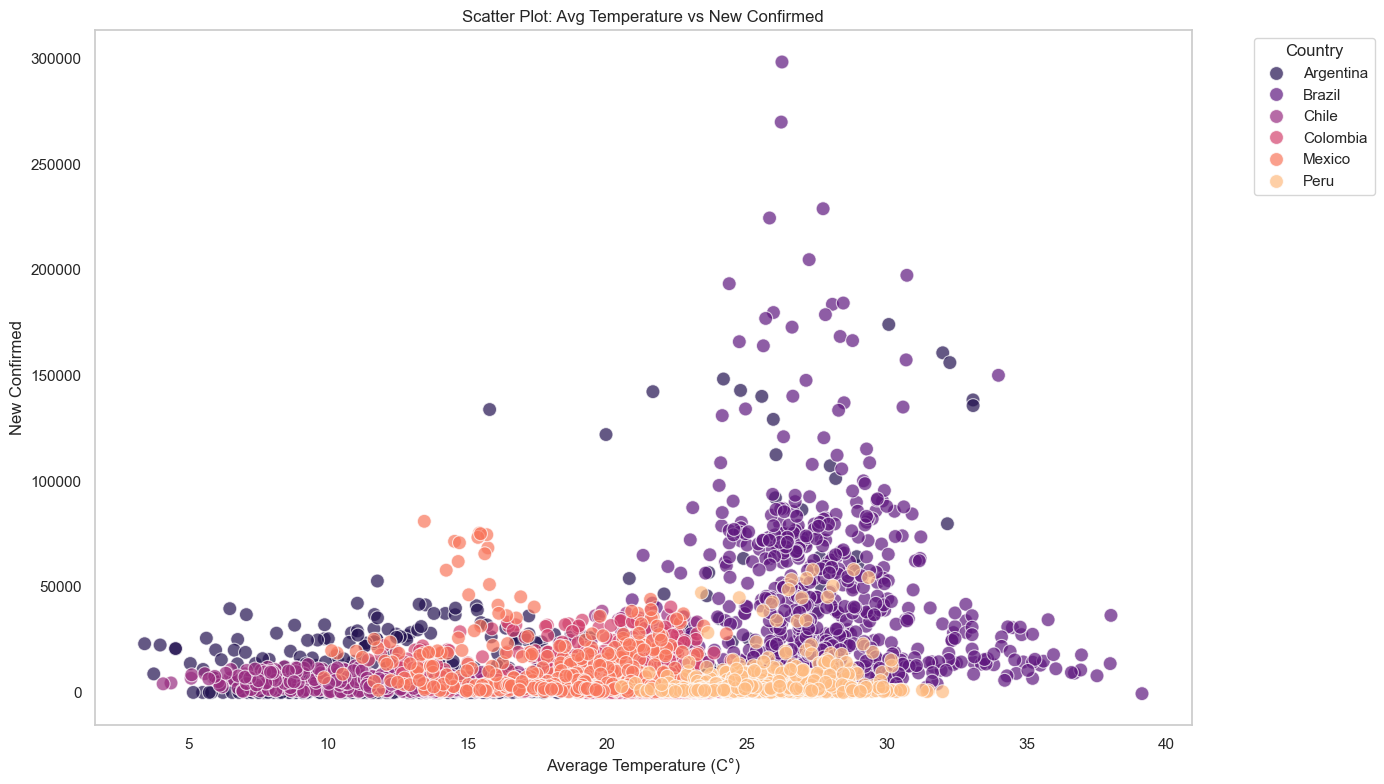

In [37]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x='average_temperature_celsius',
    y='new_confirmed',
    hue='country_name',         ## separar por pais
    palette='magma',            ## colores
    alpha=0.7,                  ## transparencia
    s=100                       ## cambio de punto a burbuja  
)

plt.title("Scatter Plot: Avg Temperature vs New Confirmed")
plt.xlabel("Average Temperature (C°)")
plt.ylabel("New Confirmed")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.tight_layout()
plt.grid()
plt.show()

### Se grafica la amplitud termica de cada pais

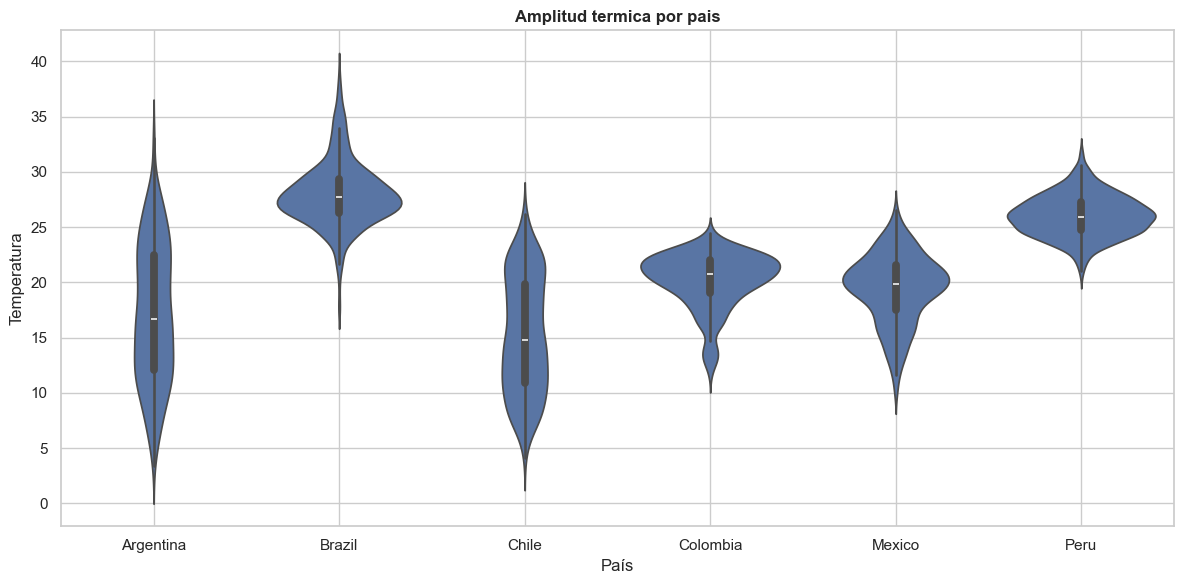

In [60]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='country_name', y='average_temperature_celsius')


plt.title('Amplitud termica por pais', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Temperatura')

plt.tight_layout()
plt.grid(True)
plt.show()

### Se grafica cantidad de casos confirmados contra cantidad de muertes

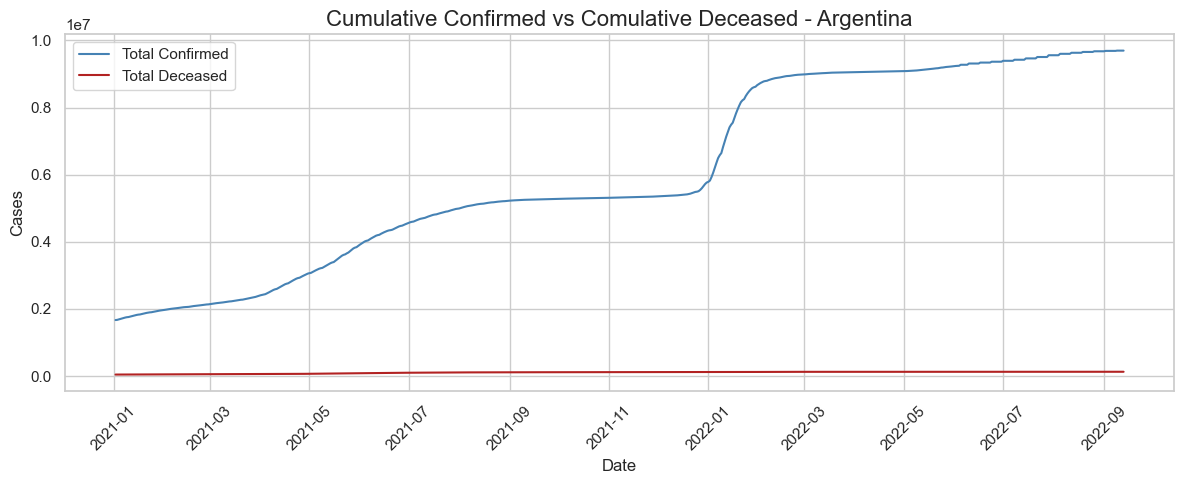

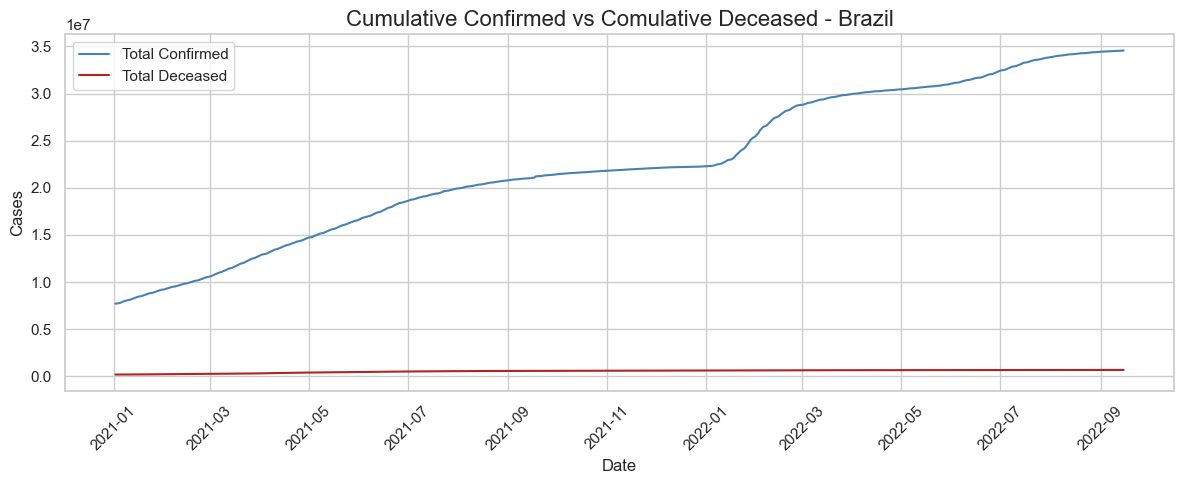

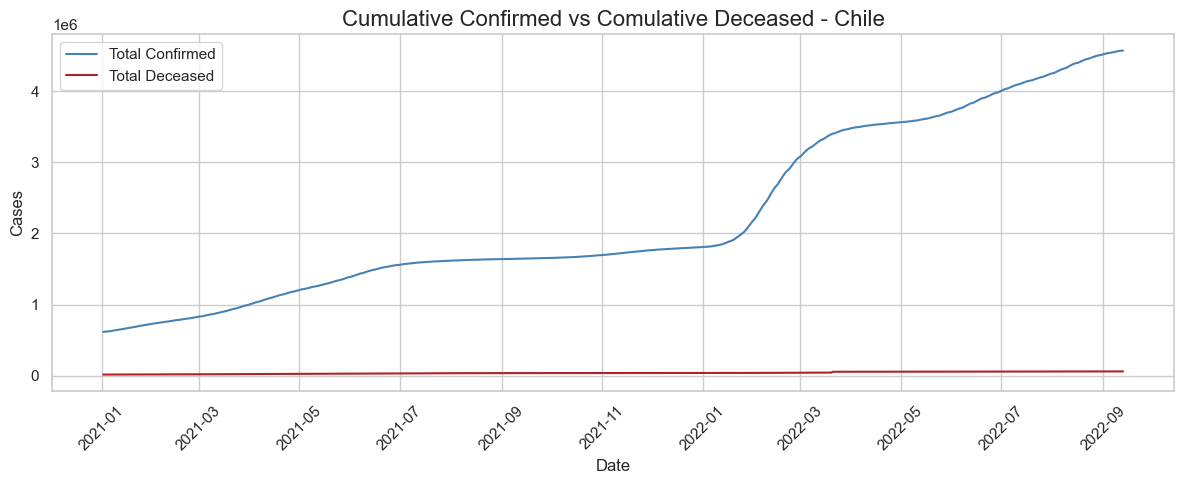

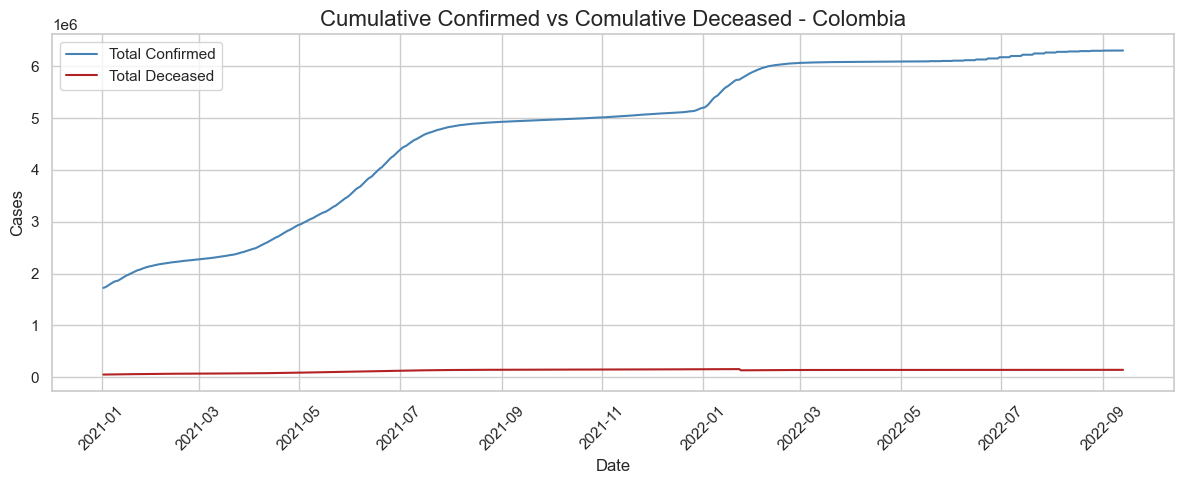

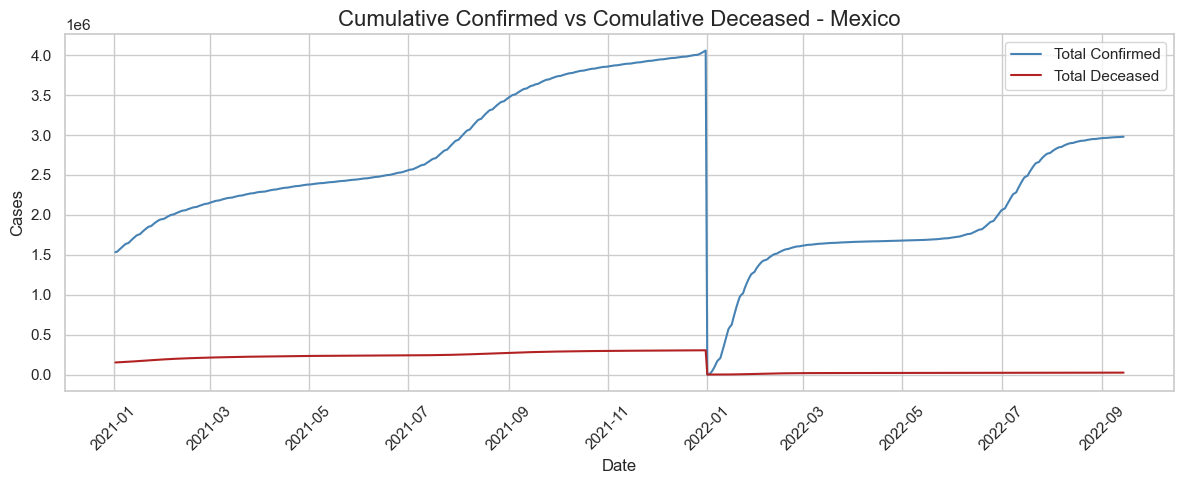

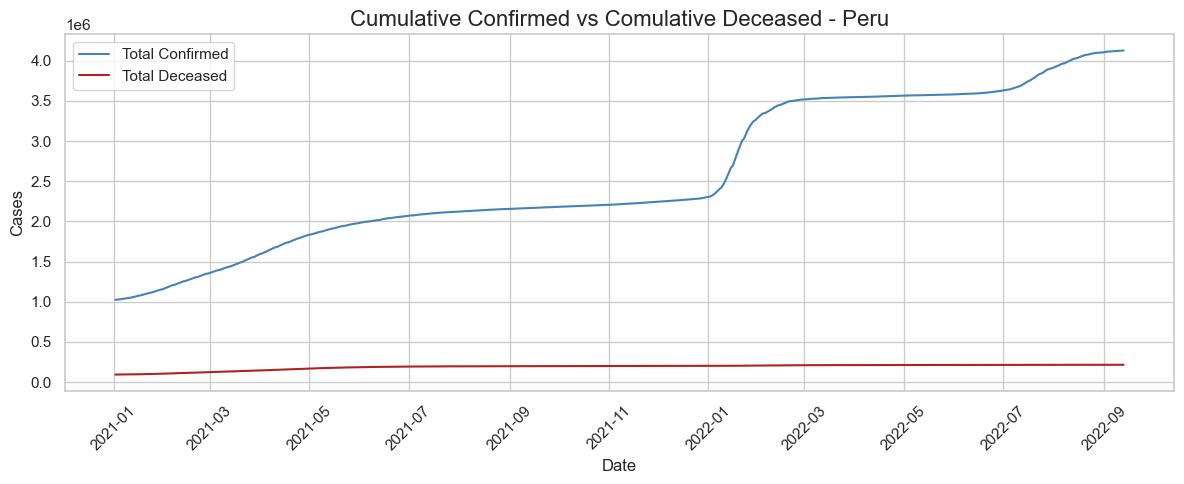

In [48]:
# Obtener lista de países únicos
countries = df["country_name"].unique()

# Iterar por cada país y graficar
for country in countries:
    # Filtrar datos del país actual
    country_data = df[df["country_name"] == country]

    # Crear figura y ejes
    plt.figure(figsize=(12, 5))

    # Graficar líneas
    sns.lineplot(data=country_data, x="date", y="cumulative_confirmed", label="Total Confirmed", color="steelblue")
    sns.lineplot(data=country_data, x="date", y="cumulative_deceased", label="Total Deceased", color="firebrick")

    # Título y etiquetas
    plt.title(f"Cumulative Confirmed vs Comulative Deceased - {country}", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Cases")

    # Formato del eje X
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.legend()
    plt.show()

### Se grafica la relacion mes por mes entre las dosis entregadas y los casos confirmados

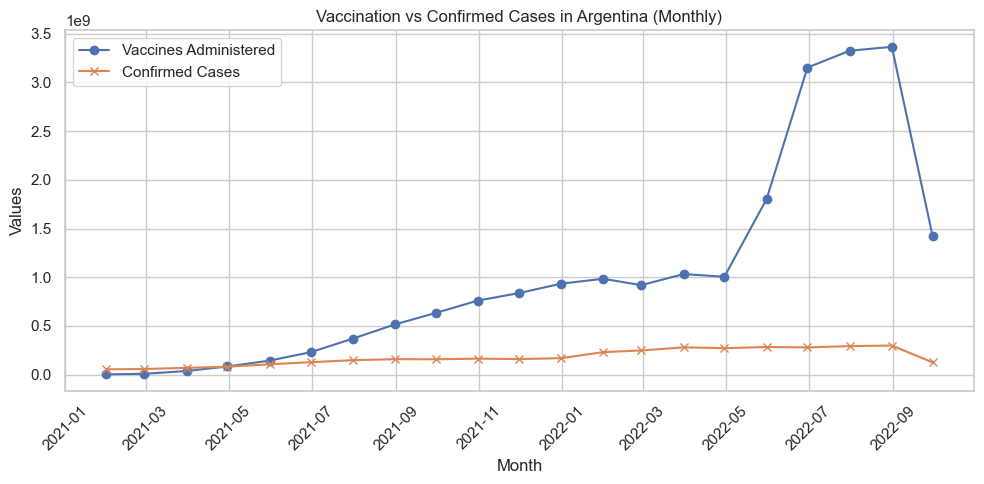

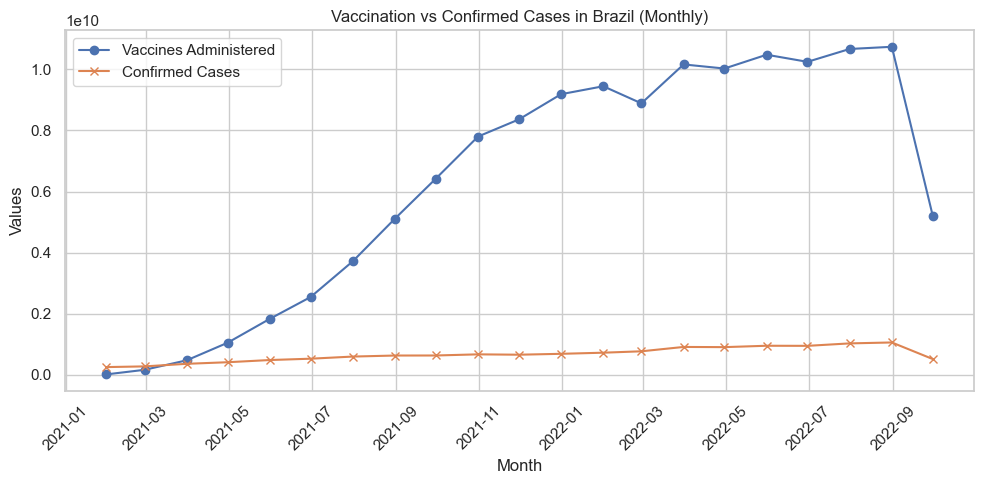

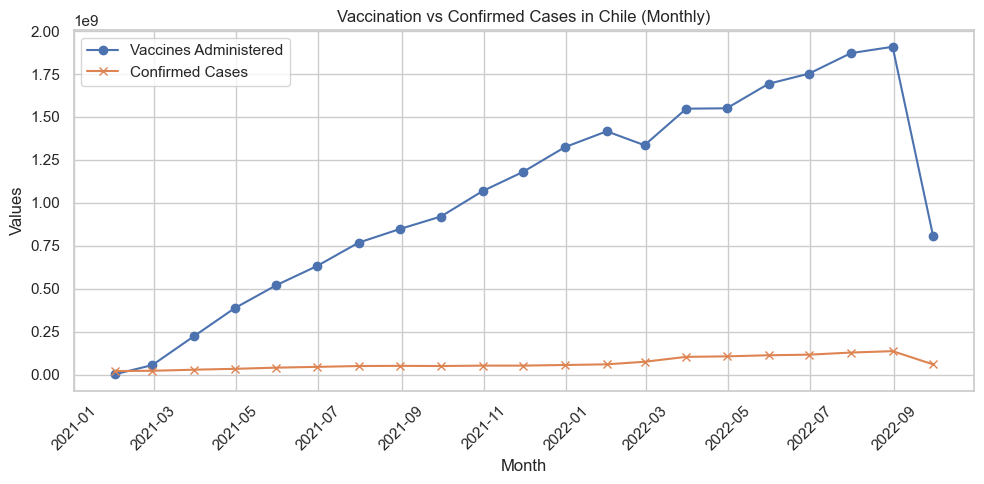

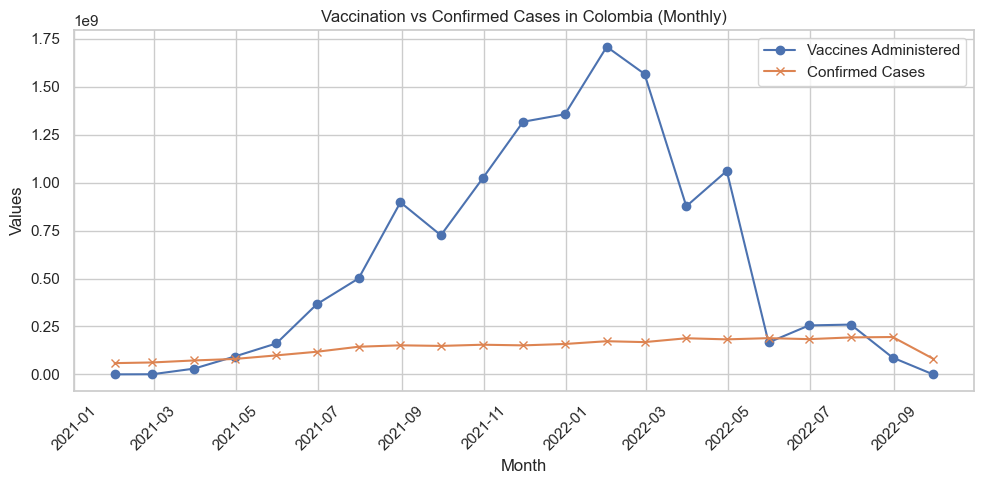

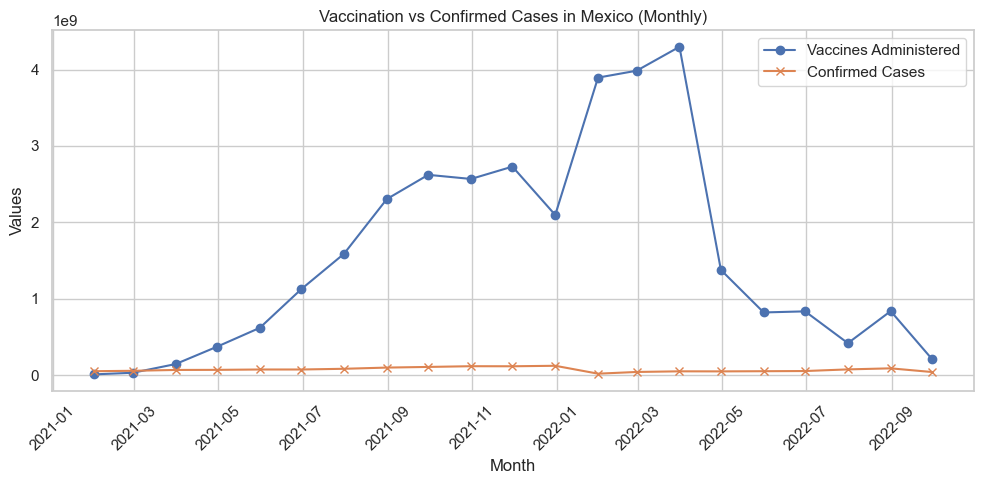

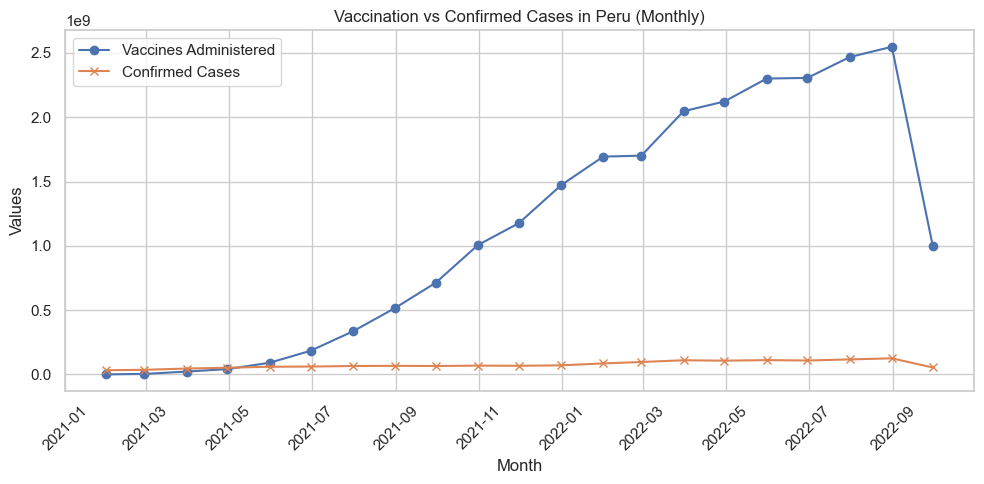

In [50]:
#pasar a fecha en caso de que se haya abierto el proyecto otro dia
df['date'] = pd.to_datetime(df['date'])
# Lista de países únicos
countries = df['country_name'].unique()

# iteracion por país
for country in countries:
    # Filtrado por pais y uso del .copy para evitar modificar el df original
    country_df = df[df['country_name'] == country].copy()

    # Reindexar por fecha y usar resample por mes
    country_df.set_index('date', inplace=True)
    monthly = country_df.resample('ME').sum(numeric_only=True)  # solo columnas numéricas

    # Asegurar que las columnas existen
    #if 'cumulative_vaccine_doses_administered' in monthly.columns and 'cumulative_confirmed' in monthly.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(monthly.index, monthly['cumulative_vaccine_doses_administered'], label='Vaccines Administered', marker='o')
    plt.plot(monthly.index, monthly['cumulative_confirmed'], label='Confirmed Cases', marker='x')

    plt.title(f'Vaccination vs Confirmed Cases in {country} (Monthly)')
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [41]:
df[['cumulative_vaccine_doses_administered', 'cumulative_confirmed']]

cumulative_vaccine_doses_administered  cumulative_confirmed
0                                   20334.0             1670634.0
1                                   20529.0             1675568.0
2                                   25164.0             1689521.0
3                                   29852.0             1703606.0
4                                   34162.0             1718102.0
...                                     ...                   ...
3739                                    NaN             4127612.0
3740                                    NaN                   NaN
3741                                    NaN                   NaN
3742                                    NaN                   NaN
3743                                    NaN                   NaN

[3744 rows x 2 columns]

### Ahora se grafica la relacion entre vacunas y casos confirmados pero teniendo en cuenta las fechas para ver la progresion de la relacion entre ambos valores

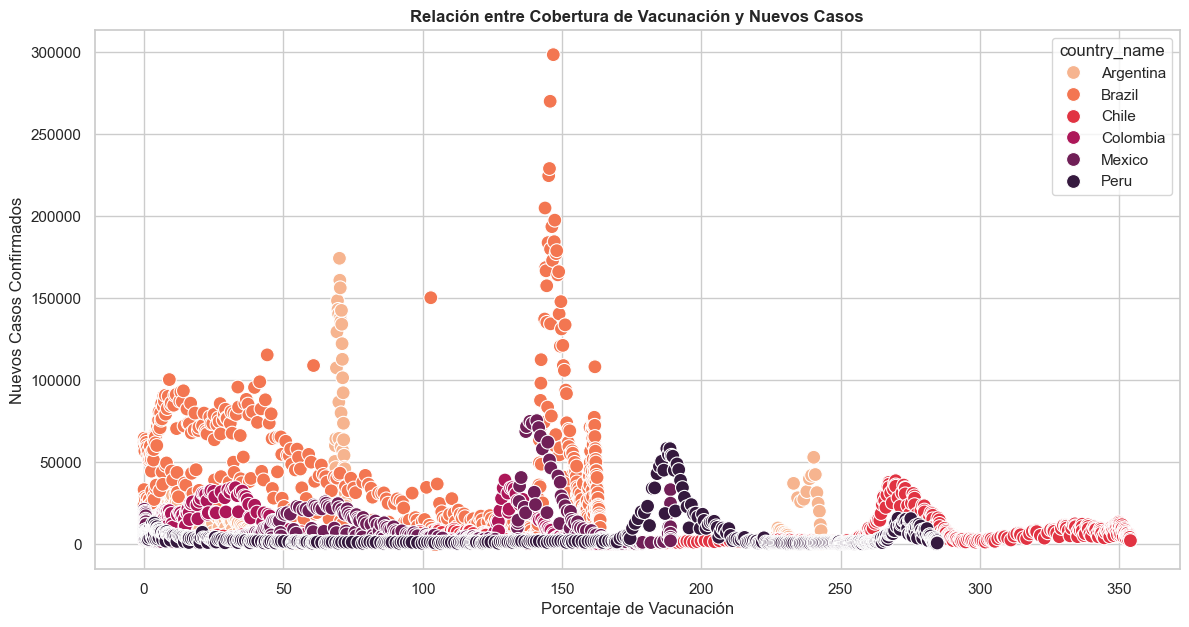

In [ ]:
df['porcentage_vacunacion'] = df['cumulative_vaccine_doses_administered'] / df['population'] * 100

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='porcentage_vacunacion', y='new_confirmed', hue='country_name', palette='rocket_r', s=100)

plt.title('Relación entre Cobertura de Vacunación y Nuevos Casos', fontweight='bold')
plt.xlabel('Porcentaje de Vacunación')
plt.ylabel('Nuevos Casos Confirmados')

plt.grid(True)
plt.show()

### Se grafica la distribucion de edades de los distintos paises

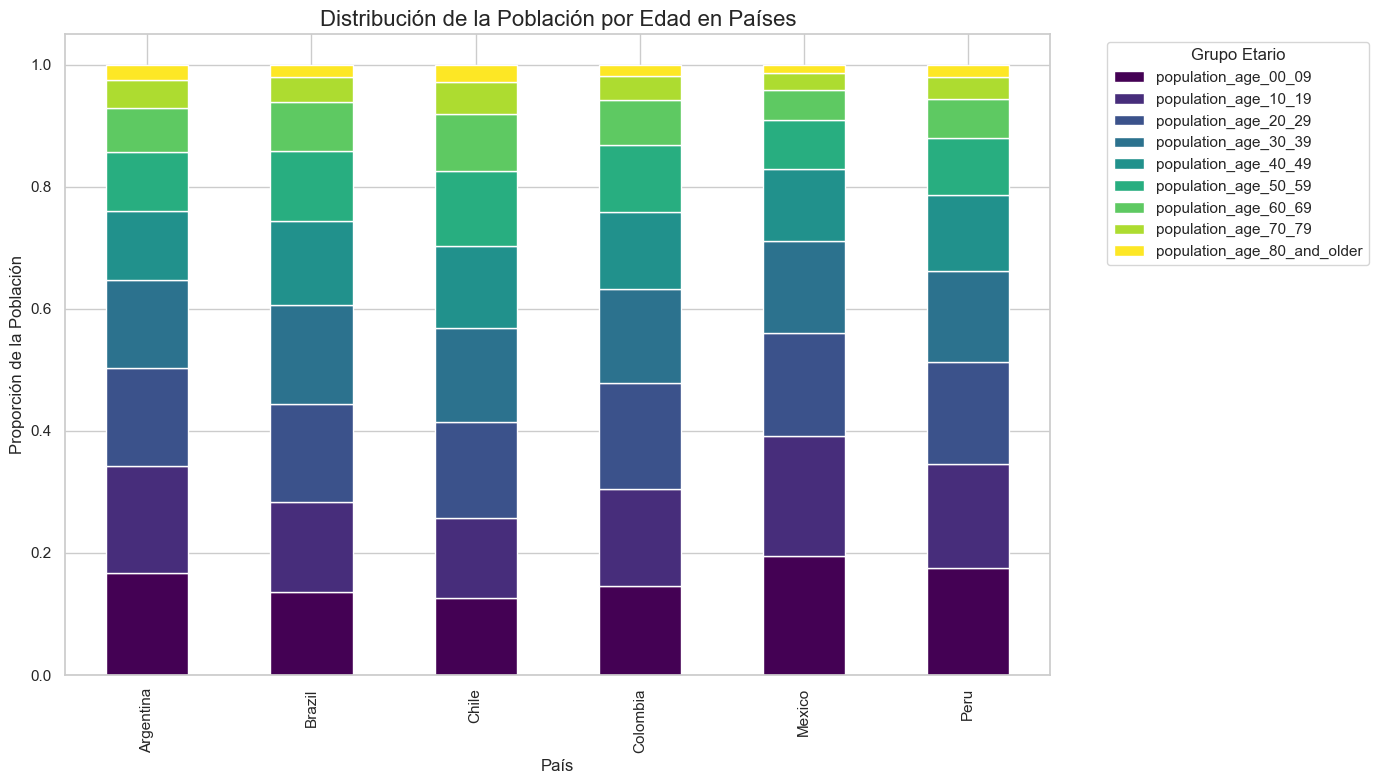

In [56]:
## Desglose de poblacion

age_columns = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Agrupamos por país y sumamos los valores
age_distribution = df.groupby('country_name')[age_columns].mean()  # o .sum() si no hay duplicados por país

colors = plt.cm.viridis(np.linspace(0, 1, len(age_columns)))

# Normalizamos para ver proporciones si preferís
age_distribution_norm = age_distribution.div(age_distribution.sum(axis=1), axis=0)

age_distribution_norm.plot(kind='bar', 
    stacked=True, 
    figsize=(14, 8), 
    color=colors)

plt.title('Distribución de la Población por Edad en Países', fontsize=16)
plt.ylabel('Proporción de la Población')
plt.xlabel('País')
plt.legend(title='Grupo Etario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Se grafica las condiciones pre existentes en los distintos paises y su relacion con la tasa de mortalidad

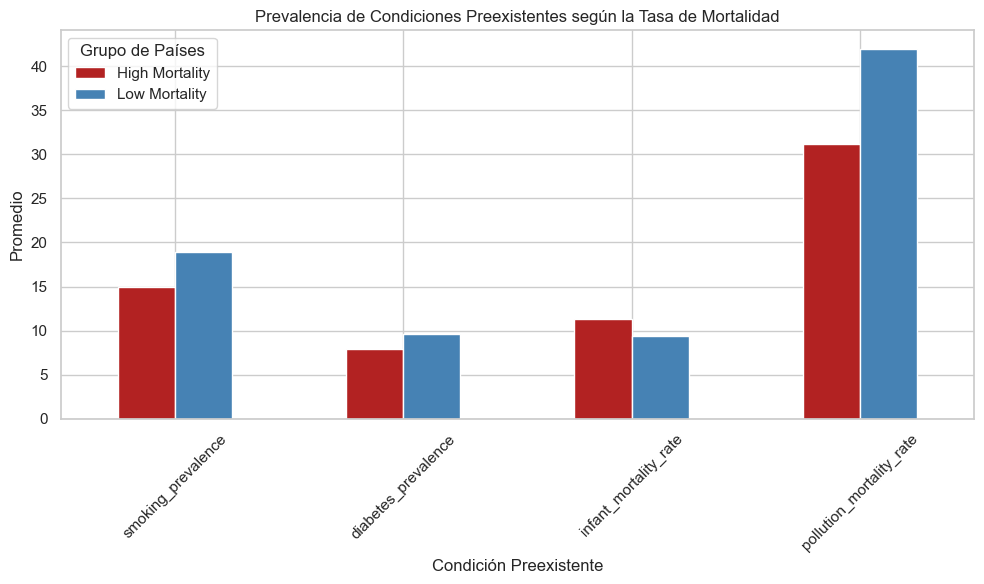

In [57]:
# Agrupar por país y obtener la tasa promedio de mortalidad por comorbilidad
mortality_by_country = df.groupby('country_name')['comorbidity_mortality_rate'].mean()

# Obtener la mediana
threshold = mortality_by_country.median()

# Clasificar países
high_mortality = mortality_by_country[mortality_by_country > threshold].index
low_mortality = mortality_by_country[mortality_by_country <= threshold].index

# Lista de condiciones preexistentes
conditions = ['smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'pollution_mortality_rate']

# Filtrar países
df_high = df[df['country_name'].isin(high_mortality)]
df_low = df[df['country_name'].isin(low_mortality)]

# Promedios por grupo
high_avg = df_high.groupby('country_name')[conditions].mean().mean()
low_avg = df_low.groupby('country_name')[conditions].mean().mean()

# Crear dataframe para graficar
comparison_df = pd.DataFrame({
    'High Mortality': high_avg,
    'Low Mortality': low_avg
}).T

comparison_df.T.plot(kind='bar', figsize=(10,6), color=['firebrick', 'steelblue'])

plt.title("Prevalencia de Condiciones Preexistentes según la Tasa de Mortalidad")
plt.ylabel("Promedio")
plt.xlabel("Condición Preexistente")
plt.xticks(rotation=45)
plt.legend(title="Grupo de Países")
plt.tight_layout()
plt.show()

### Se calcula el impacto de la urbanizacion en la propagacion del covid

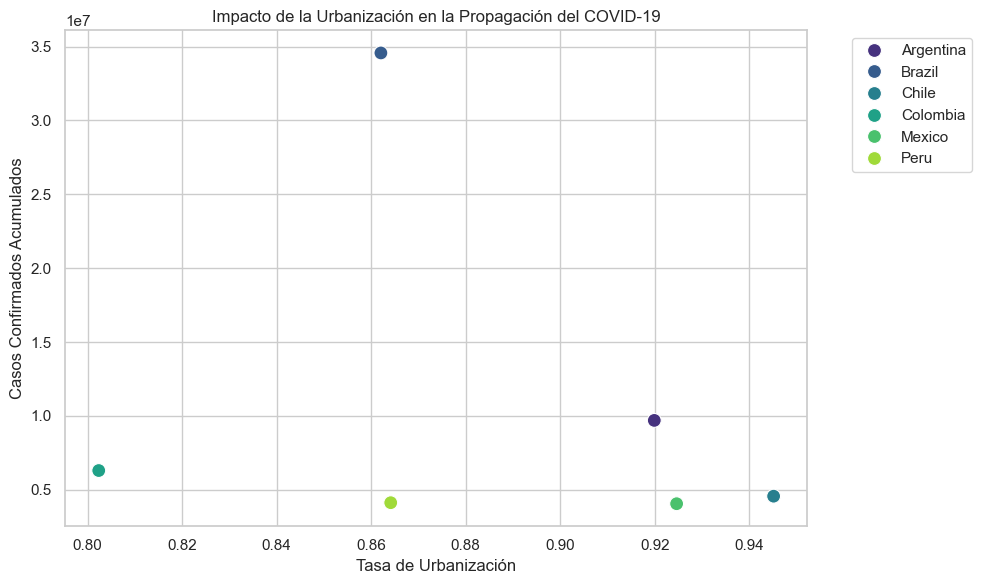

In [58]:
# Calculo de poblacion urbana

df['urbanization_rate'] = df['population_urban'] / df['population']

#calculo de casos por pais

urban_impact = df.groupby('country_name').agg({
    'urbanization_rate': 'mean',  # o el último valor
    'cumulative_confirmed': 'max'  # total de casos al final del período
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=urban_impact,
    x='urbanization_rate',
    y='cumulative_confirmed',
    hue='country_name',
    palette='viridis',
    s=100
)
plt.title("Impacto de la Urbanización en la Propagación del COVID-19")
plt.xlabel("Tasa de Urbanización")
plt.ylabel("Casos Confirmados Acumulados")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Se realiza un analisis temporal de mortalidad

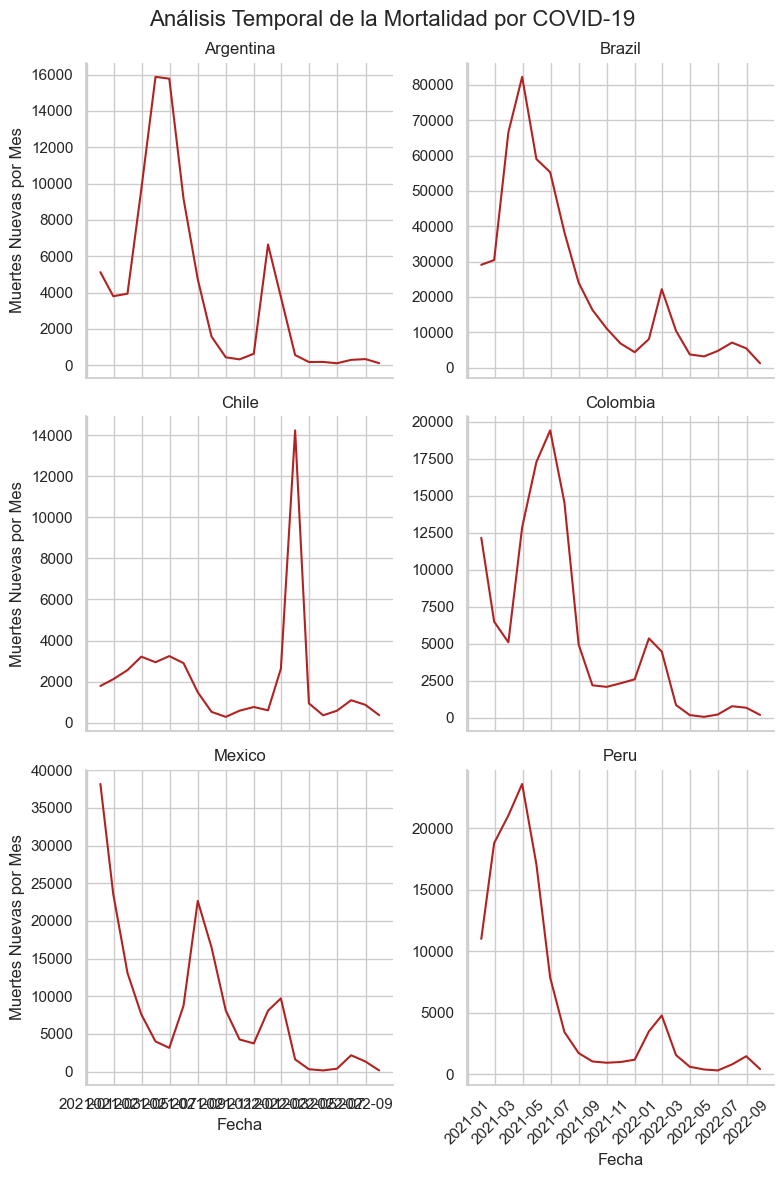

In [59]:
#se agrupa por mes

df_monthly = df.set_index('date').groupby('country_name').resample('ME')['new_deceased'].sum().reset_index()

# Elegimos algunos países si hay muchos
paises = df['country_name'].unique()[:6]  # por ejemplo los primeros 6
df_filtrado = df_monthly[df_monthly['country_name'].isin(paises)]

# Crear gráficos
g = sns.FacetGrid(
    df_filtrado,
    col="country_name",
    col_wrap=2,
    height=4,
    sharey=False
)

g.map_dataframe(sns.lineplot, x='date', y='new_deceased', color='firebrick')
g.set_axis_labels("Fecha", "Muertes Nuevas por Mes")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Análisis Temporal de la Mortalidad por COVID-19", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
